# **Telco Customer Churn**
---

**By Beta Group:**
1. Khairunnisa Nur Afifah (JCDS0508-007)
2. Mayang Sari (JCDS0508-009)
3. Stefanus William Alexander (JCDS0508-017)

<div style="text-align: center">
    <img src="https://miro.medium.com/v2/resize:fit:1400/0*1xpyGAJH3PgjTSCn">
</div>

## **1. Business Problem**

**Context**

Telco company rely heavily on **customers** as their primary source of **revenue**. In a **subscription-based industry**, **recurring revenue** serves as the cornerstone of the business. Consequently, **churn (customer attrition)** not only results in **immediate revenue loss** but also **increases acquisition costs** to replace departing customers (Infopulse). Global studies show that **retaining existing customers** is significantly **cheaper** than acquiring new ones, making **churn reduction a strategic priority** for telcos. By proactively detecting potential churn, companies can strengthen customer loyalty, enhance satisfaction, and ultimately drive business profitability.

As an independent consultant, NexaData Solutions has been commissioned by telco company (X) to execute this project. 
We will leverage advanced data analytics to identify customer behavior patterns, uncover key drivers of churn, and provide actionable insights to help telco company (X) reduce churn rate. In doing so, the company can enhance customer satisfaction and increase profit or at least maintain it.

[reference](https://www.infopulse.com/blog/how-to-reduce-churn-telecom)

**To Division**

Corporate Strategy & Business Development and Sales & Marketing

**Target**

Yes: The customer churn (discontinues the service)

No: The customer does not churn (continues using the service)

**Problem Statement**

According to **[Freemove](https://www.freemove.com/magazine/understanding-churn-rate-in-the-telecom-industry/)**, a **high churn rate** can **hinder business growth** and increase **customer acquisition costs**, which are **higher than retaining existing customers**. If **at-risk customers** are not detected early, the company will **lose revenue** and face **reduced competitiveness** as customers switch to competitors with **more attractive offers**.

**Goal**

Based on the problem statement above, the objectives to be achieved are:  

- **How can a churn prediction model be developed** to effectively identify and retain at-risk customers?  
- **Are there specific patterns** in customer behavior or service characteristics that contribute to churn, which can be leveraged to improve retention strategies?  
- **What recommendations** can be implemented based on the churn prediction model to **reduce churn rate, enhance customer retention, and optimize promotional costs**?

**Metric Evaluation**

Example Calculation Based on the Approach from the Statistics Report:

- **Customer Acquisition Cost (CAC)**: $694 (average CAC on telecommunication industry: [reference](https://userpilot.com/blog/average-customer-acquisition-cost/))

Customer Acquisition Cost:Customer Retention Cost = 5:1 → considering new customer acquisition is at least five times costlier than retaining an existing customer ([reference](https://www.forbes.com/councils/forbestechcouncil/2022/02/02/why-and-how-you-should-celebrate-customer-retention-the-same-as-acquisition/)).

---  

**Type 1 Error** → **False Positive (FP)**: The model predicts that a **customer will churn**, but in reality, the customer **does not churn**.  

- **Impact:** The company **wastes resources** on unnecessary retention offers, **reducing profitability** and **misallocating efforts** that should be focused on truly **at-risk customers**.

- **Assumed Cost (CRC)**: Potential loss per false positive: **$CAC/5 = $139**.  

**Type 2 Error** → **False Negative (FN)**: The model predicts that a **customer will not churn**, but in reality, the customer **churn**.  

- **Impact**: The company **loses customers** due to missed retention opportunities, leading to a **higher churn rate** and **lost revenue**.

- **Assumed Cost**: Potential loss per false negative: **$CAC + Average Monthly Charges** = $694 + $70 = **$764** 

---
It is crucial for the company to use predictive methods that **minimize errors in identifying churned customers (False Negatives)** while also **reducing errors in classifying loyal customers as churned (False Positives)**.  

However, the model should prioritize **minimizing False Negatives (FN)** over False Positives (FP), as the financial consequences of **losing customers (FN)** are **much more severe**. When customers truly churn but are not detected by the model (FN), the company **loses the entire potential revenue** from those customers, both in the short term and in the future.

**Conclusion:**  

In this case, **F2-Score** is a more suitable metric to use because it places **greater emphasis on Recall** compared to Precision. In churn prediction, **False Negatives (FN)** have a far greater impact on revenue losses than **False Positives (FP)**. Therefore:  

- **F2-Score prioritizes the model’s sensitivity** to customers who are at genuine risk of churn.  
- By **increasing Recall** (**reducing FN**), the company can **minimize the loss of potential customers** who could be retained through proactive strategies like promotions or additional services.  
- **F2-Score still considers Precision** to ensure that the number of **False Positives (FP)** does not become too large, keeping the **incentive costs under control**.  

By using **F2-Score**, the company can achieve an **optimal balance** between **reducing customer loss** and **efficiently managing promotional costs**.

## **2. Data Understanding**

Dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

The available dataset contains information categorized into the following main sections:

- `Demographic Customer`: gender, SeniorCitizen, Partner, Dependents
- `Account Information`: customerID, tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn
- `Customer Services`: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

Each data row represents a unique customer account and their subscription details for a telco company.

**Attribute Information**

| Column | Type | Description |
| --- | --- | --- |
| customerID | Object | A unique ID that identifies each customer |
| gender | Object | The customer's gender (Male, Female) |
| SeniorCitizen | Integer | Whether the customer is a senior citizen (>65yo) or not (0, 1) |
| Partner | Object | Whether the customer has a partner or not (Yes, No) |
| Dependents | Object | Whether the customer has dependents or not (Yes, No) |
| tenure | Integer | Number of months the customer has stayed with the company |
| PhoneService | Object | Whether the customer subscribes to phone service or not (Yes, No) |
| MultipleLines | Object | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Object | Whether the customer subscribes to internet service or not (DSL, Fiber optic, No) |
| OnlineSecurity | Object | Whether the customer subscribes to an additional online security service or not (Yes, No, No internet service) |
| OnlineBackup | Object | Whether the customer subscribes to an additional online backup service or not (Yes, No, No internet service) |
| DeviceProtection | Object | Whether the customer subscribes to an additional device protection plan or not (Yes, No, No internet service) |
| TechSupport | Object | Whether the customer subscribes to an additional tech support plan or not (Yes, No, No internet service) |
| StreamingTV | Object | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Object | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | Object | The contract term of the customers (Month-to-month, One year, Two year) |
| PaperlessBilling | Object | Whether the customer has chosen paperless billing or not (Yes, No) |
| PaymentMethod | Object | The customer payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card) |
| MonthlyCharges | Float | The amount charged to the customer monthly |
| TotalCharges | Object | The total amount charged to the customer |
| Churn | Object | Whether the customer churned or not (Yes or No) |

In [912]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [913]:
pd.set_option('display.max_columns', None)

In [914]:
import warnings
warnings.filterwarnings('ignore')

In [915]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [916]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [917]:
print(f'The number of rows and columns in this dataset is {df.shape[0]} rows and {df.shape[1]} columns.')

The number of rows and columns in this dataset is 7043 rows and 21 columns.


This dataset represents information from 7,043 customers of a telecommunications company, which can be used to analyze customer behavior, churn rate, or usage patterns.

In [918]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. Column `SeniorCitizen` **should be converted to an object** with values **"Yes"/"No"** to facilitate exploratory analysis.
2. Column `TotalCharges` **should be converted to float** as it represents a numerical value (total cost) and facilitates calculations. If it remains as a string, empty values won’t be detected as missing values, making them difficult to handle.

In [919]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == 1, 'Yes', 'No')

In [920]:
df[df['TotalCharges'] < '0']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [921]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [922]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [923]:
if np.any(df[df['TotalCharges'] == ' '] == df[df['tenure'] == 0]):
    print('yes')
else:
    print('no')

yes


In the `TotalCharges` column, the missing values come from customers with a tenure of 0 months. This indicates that they have not yet completed a full month with the company and have not been charged

In [924]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Since the customers have not been charged, we can fill the missing values with 0.

In [925]:
df['TotalCharges'] = df['TotalCharges'].fillna(value=0)

Next, we will modify the values in the target column, `Churn`, to 0 and 1, where 0 indicates that the customer remains with the company (no churn), and 1 indicates that the customer has left (churn).

In [926]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [927]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [928]:
df['Churn'].value_counts()/len(df)

Churn
0    0.73463
1    0.26537
Name: count, dtype: float64

In [929]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00


- The average `tenure` is 32.37 months, ranging from **0 to 72 months**.
- The average `MonthlyCharges` is $64.76, with a range of **$18.25 - $118.75**.
- The average `TotalCharges` is $2279.73, with a minimum of **$0** and a maximum of **$8684.80**.

In [930]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


> Checking Anomalies

The anomaly in this data refers to customers who do not use any services, either phone or internet. If a person does not subscribe to both, their data should not exist in this dataset.

In [931]:
df[(df['PhoneService'] == 'No') & (df['InternetService'] == 'No')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [932]:
df[df['MultipleLines'] == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0
10,9763-GRSKD,Male,No,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,0871-OPBXW,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0
7033,9767-FFLEM,Male,No,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,0
7035,8456-QDAVC,Male,No,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,0
7037,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0


In [933]:
df[df['PhoneService'] == 'No']['MultipleLines'].value_counts()

MultipleLines
No phone service    682
Name: count, dtype: int64

The output shows that if customers do not subscribe to phone service, they cannot have have multiple lines. From this, we can conclude that the `MultipleLines` column depends on the `PhoneService` column, and whenever PhoneService is "No", the MultipleLines values will always be "No phone service".

In [934]:
df[df['InternetService'] == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,No,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0
16,8191-XWSZG,Female,No,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0
21,1680-VDCWW,Male,No,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0
22,1066-JKSGK,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
33,7310-EGVHZ,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,No,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
7019,9710-NJERN,Female,No,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,0
7020,9837-FWLCH,Male,No,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0
7030,0871-OPBXW,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0


In [935]:
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    display(df[df['InternetService'] == 'No'][i].value_counts())

OnlineSecurity
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No internet service    1526
Name: count, dtype: int64

TechSupport
No internet service    1526
Name: count, dtype: int64

StreamingTV
No internet service    1526
Name: count, dtype: int64

StreamingMovies
No internet service    1526
Name: count, dtype: int64

If a customer **does not subscribe to internet service**, they are automatically recorded as "No internet service" for all related services, including `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`.

In [936]:
summary = []

for col in df.columns:
    summary.append([col, df[col].dtype, df[col].nunique(), df[col].isna().sum(), df[col].unique()])

pd.DataFrame(columns=['column name', 'data type', 'unique count', 'missing values', 'unique values'], data=summary)

,column name,data type,unique count,missing values,unique values
0,customerID,object,7043,0,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,2,0,"[Female, Male]"
2,SeniorCitizen,object,2,0,"[No, Yes]"
3,Partner,object,2,0,"[Yes, No]"
4,Dependents,object,2,0,"[No, Yes]"
5,tenure,int64,73,0,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,object,2,0,"[No, Yes]"
7,MultipleLines,object,3,0,"[No phone service, No, Yes]"
8,InternetService,object,3,0,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,3,0,"[No, Yes, No internet service]"


> Save Clean Dataset for Machine Learning

In [ ]:
df.to_csv('Telco Customer Churn - ML.csv', index=False)

## **3. Exploratory Data Analysis**

In [938]:
columns_to_check =  df.select_dtypes(include=['int64', 'float64']).columns

from scipy.stats import shapiro

for col in columns_to_check:
    stat, p = shapiro(df[col])
    if p > 0.05:
        print(f"{col}: Data follows a normal distribution (p-value={p:.3f})")
    else:
        print(f"{col}: Data does not follow a normal distribution (p-value={p:.3f})")

tenure: Data does not follow a normal distribution (p-value=0.000)
MonthlyCharges: Data does not follow a normal distribution (p-value=0.000)
TotalCharges: Data does not follow a normal distribution (p-value=0.000)
Churn: Data does not follow a normal distribution (p-value=0.000)


<Axes: >

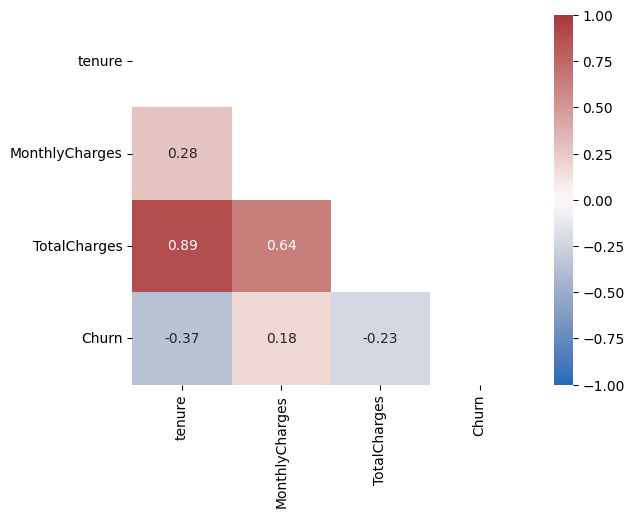

In [939]:
sns.heatmap(df.corr('spearman', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='vlag', mask=np.triu(np.ones_like(df.corr('spearman', numeric_only=True), dtype=bool)))

From the heatmap above, we can say customers with low tenure are more likely to churn than long-term customers → **Tenure & Churn negative correlation (-0.37):** The longer a customer stays, the lower their likelihood of churning. Additionally, `TotalCharges` and `tenure` have a high correlation of 0.89, which makes sense because the longer a customer remains with the company, the higher their cumulative charges are likely to be. Similarly, `TotalCharges` and `MonthlyCharges` also show a significant correlation of 0.64, indicating a notable relationship between these variables.

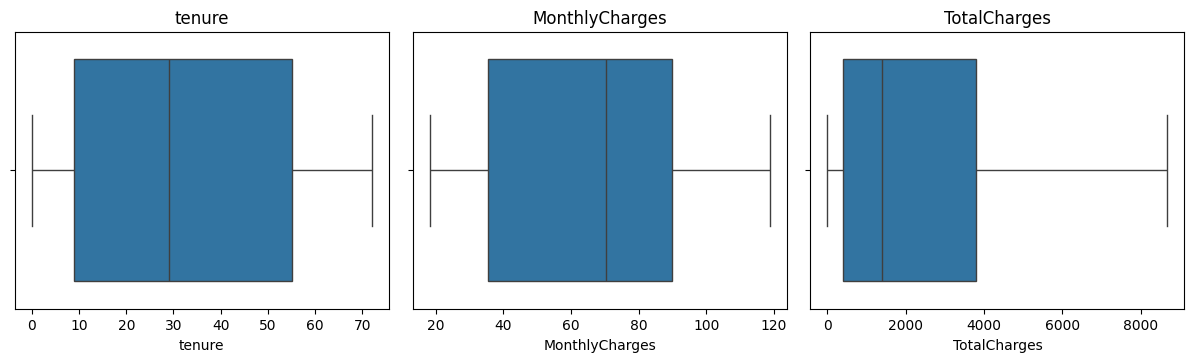

In [940]:
plt.figure(figsize=(20, 10))

col_num = []
for i in df.columns:
    if (df[i].dtype == 'float64') | (df[i].dtype == 'int64') and i not in ['Churn']:
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

The data distribution for each variable is fairly stable and no significant outliers are found.

## **4. Data Analysis**

### **4.1 Number of Churn Customers**

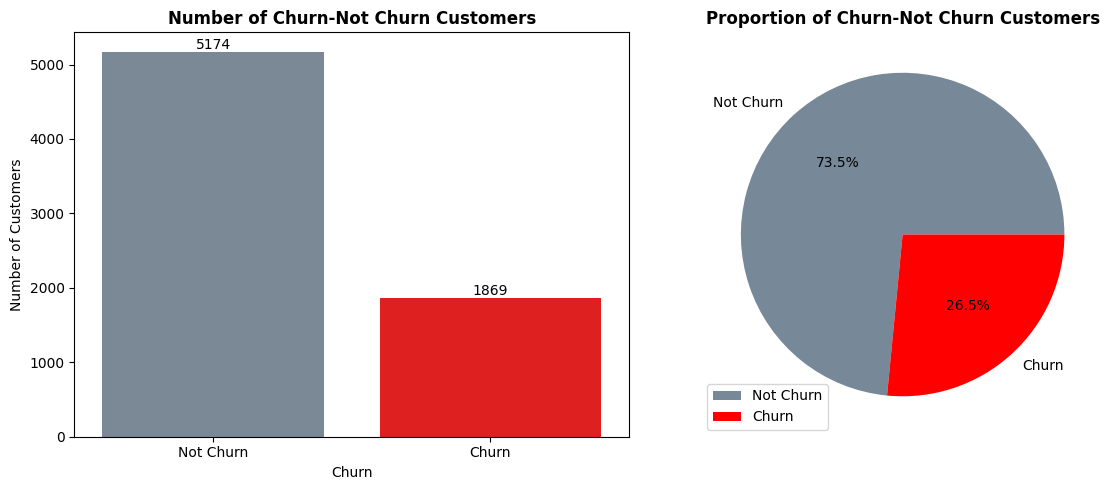

In [941]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Number of Churn-Not Churn Customers', fontweight='bold')
cntplot = sns.countplot(x=df['Churn'], hue=df['Churn'], palette=['lightslategrey', 'red'], legend=False)
for p in cntplot.patches:
    if p.get_height() > 1:
        cntplot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(ticks=[0,1], labels=['Not Churn', 'Churn'])
plt.ylabel('Number of Customers')

plt.subplot(1,2,2)
plt.title('Proportion of Churn-Not Churn Customers', fontweight='bold')
plt.pie(x=df['Churn'].value_counts(), labels=df['Churn'].value_counts().reset_index()['Churn'].map({0:'Not Churn', 1:'Churn'}), autopct='%.1f%%', colors=['lightslategrey', 'red'])
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

A total of 1869 customers, representing 26.5% of total customer, have churned from the company. The average annual churn rate in the US telecommunication industry is approximately 21% ([reference](https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/)). This significant difference indicates that a churn rate of **26.5% is relatively high** by comparison and may reflect underlying challenges such as customer dissatisfaction, increased competition, or changes in business strategy.

In [942]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Next, we will divide the categorical features into 4 sections to simplify the analysis. The sections are customer demographic, phone service and service included in it, internet service and services included in it, and account information.
- Customer demographics includes gender, senior citizen, partner, and dependents
- If a customer subscribed to phone service, they have have the option to have multiple lines
- If a customer subscribed to internet service, they have the option to subscribe to online security, online backup, device protection, tech support, streaming TV, and streaming movies
- Account information includes contract, paperless billing, and payment method

### **4.2 Customer Demographic**

In [943]:
for i in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    display(df.groupby(i)['Churn'].value_counts(normalize=True))

gender  Churn
Female  0        0.730791
        1        0.269209
Male    0        0.738397
        1        0.261603
Name: proportion, dtype: float64

SeniorCitizen  Churn
No             0        0.763938
               1        0.236062
Yes            0        0.583187
               1        0.416813
Name: proportion, dtype: float64

Partner  Churn
No       0        0.670420
         1        0.329580
Yes      0        0.803351
         1        0.196649
Name: proportion, dtype: float64

Dependents  Churn
No          0        0.687209
            1        0.312791
Yes         0        0.845498
            1        0.154502
Name: proportion, dtype: float64

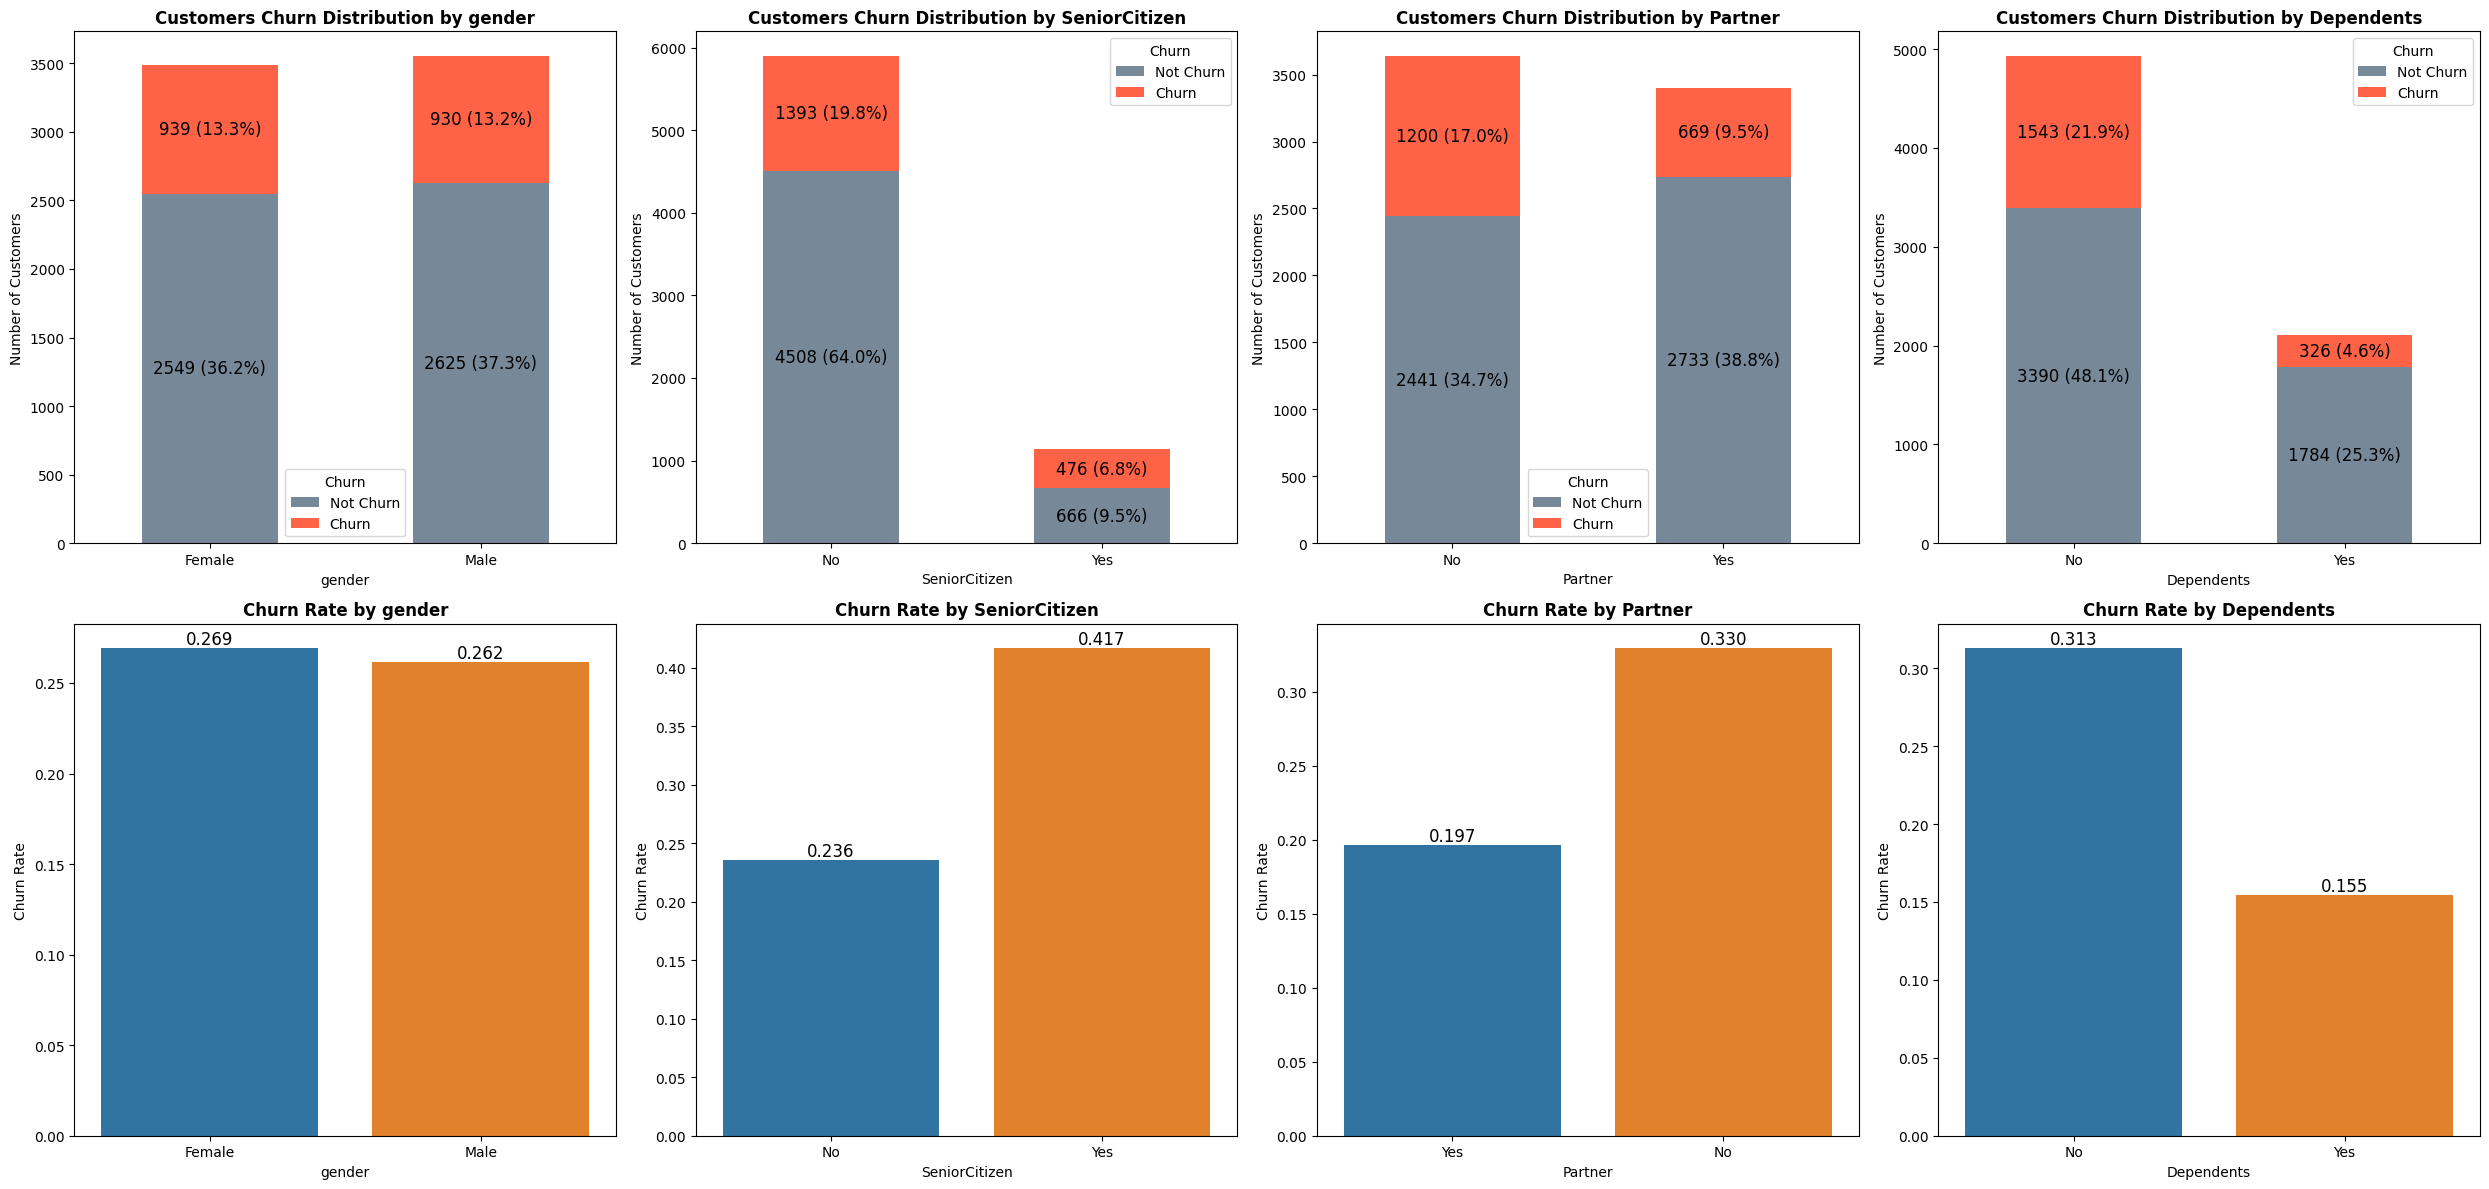

In [944]:
plt.figure(figsize=(25, 12))

col_num = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i, col in enumerate(col_num):
    plt.subplot(2, 4, i+1)
    ax = pd.crosstab(index=df[col], columns=df['Churn']).plot(kind='bar', stacked=True, color=['lightslategrey', 'tomato'], ax=plt.gca())
    plt.title(f'Customers Churn Distribution by {col}', fontweight='bold')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f} ({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=12)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=360)
    plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

    plt.subplot(2, 4, i+5)
    bar = sns.barplot(data=df, x=col, y='Churn', hue=col, errorbar=None)
    plt.title(f'Churn Rate by {col}', fontweight='bold')
    for p in bar.containers:
        bar.bar_label(p, fmt='%.3f', fontsize=12)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

As we can see from the bar plot and proportion above:
- Female has a churn rate of 26.9% while male has a churn rate of 26.2%. The difference in churn rate between male and female is very small, only about 0.7%. This indicates that **gender does not significantly influences churn behaviour**. Around 73% of both female and male customers do not churn.
- Customers categorized as senior citizen have a churn rate of 41.7%, while customers who don't have a churn rate of 23.6%. This noticeable difference suggests that **being a senior citizen is associated with a higher churn rate**. This is possibly because many seniors are retired and may have reduced household incomes.
- Customers without a partner have a churn rate of 33%, while those with a partner have a churn rate of 19.7%. This difference suggests that **having a partner is associated with a lower churn rate**. Customers with a partner often share subscription costs, making the financial burden lighter and increasing their commitment to the service. In contrast, customers without a partner must bear the full cost, making them more price-sensitive and more likely to switch to a cheaper provider. Additionally, their more flexible lifestyle—such as frequently moving or trying new services—further increases the risk of churn.
- Customers without dependents have a churn rate of 31.3% and those with dependents have a churn rate of 15.5%. This significant difference suggests that **customers without dependents are more likely to churn**, possibly because they have fewer household responsibilities and may be more flexible in switching providers. Having dependents creates a stronger attachment to the service as households share usage, making switching providers more inconvenient. In contrast, customers without dependents are more flexible in changing or canceling their subscriptions.

Overall, **gender does not have a significant impact on churn**, while **being a senior citizen, not having a partner, or not having dependents might increases the likelihood of churn**.

### **4.3 Analysis by Services**

In [945]:
dfs = pd.DataFrame({
    'ServiceUsed': ['Both phone and internet', 'Phone only', 'Internet only'],
    'Count': [df[(df['PhoneService'] == 'Yes') & (df['InternetService'] != 'No')]['customerID'].count(), df[(df['PhoneService'] == 'Yes') & (df['InternetService'] == 'No')]['customerID'].count(), df[(df['PhoneService'] == 'No') & (df['InternetService'] != 'No')]['customerID'].count()]
})
dfs

,ServiceUsed,Count
0,Both phone and internet,4835
1,Phone only,1526
2,Internet only,682


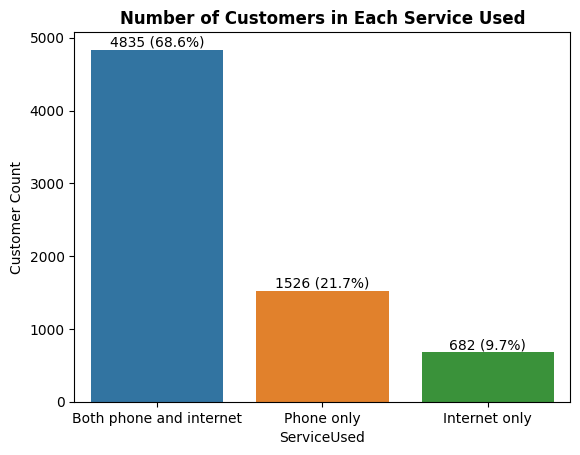

In [946]:
plt.title('Number of Customers in Each Service Used', fontweight='bold')
cntplot = sns.barplot(x=dfs['ServiceUsed'], y=dfs['Count'], hue=dfs['ServiceUsed'])
for p in cntplot.patches:
    if p.get_height() > 1:
        cntplot.annotate(f'{p.get_height():.0f} ({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.ylabel('Customer Count')
plt.show()

A total of 4835 customers, representing 68.6% of the customer base, used both phone and internet service.

#### **4.3.1 Phone Service**

In [947]:
for i in ['PhoneService', 'MultipleLines']:
    display(df.groupby(i)['Churn'].value_counts(normalize=True))

PhoneService  Churn
No            0        0.750733
              1        0.249267
Yes           0        0.732904
              1        0.267096
Name: proportion, dtype: float64

MultipleLines     Churn
No                0        0.749558
                  1        0.250442
No phone service  0        0.750733
                  1        0.249267
Yes               0        0.713901
                  1        0.286099
Name: proportion, dtype: float64

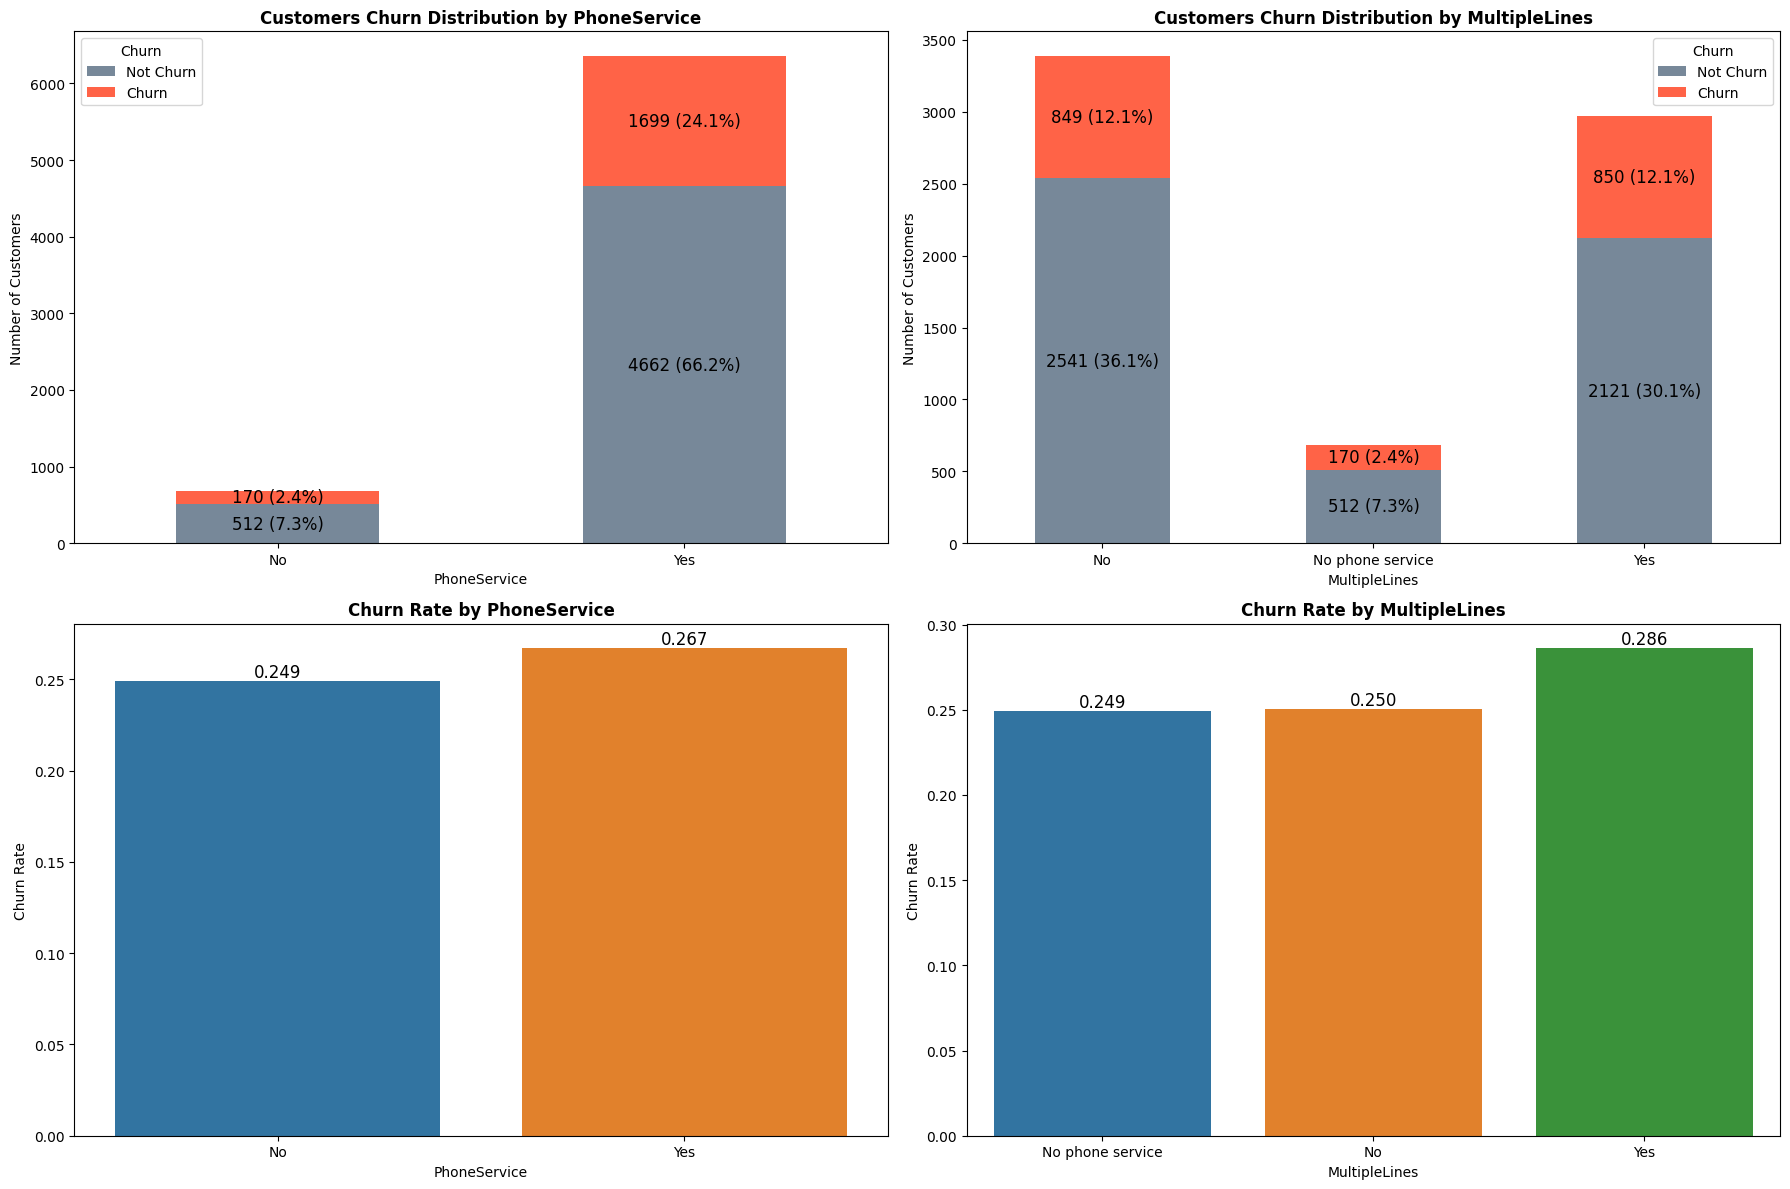

In [948]:
plt.figure(figsize=(18, 12))

col_num = ['PhoneService', 'MultipleLines']

for i, col in enumerate(col_num):
    plt.subplot(2, 2, i+1)
    ax = pd.crosstab(index=df[col], columns=df['Churn']).plot(kind='bar', stacked=True, color=['lightslategrey', 'tomato'], ax=plt.gca())
    plt.title(f'Customers Churn Distribution by {col}', fontweight='bold')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f} ({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=12)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=360)
    plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

    plt.subplot(2, 2, i+3)
    bar = sns.barplot(data=df, x=col, y='Churn', hue=col, errorbar=None)
    plt.title(f'Churn Rate by {col}', fontweight='bold')
    for p in bar.containers:
        bar.bar_label(p, fmt='%.3f', fontsize=12)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

As shown in the bar plot and proportion above, neither phone service nor multiple lines significantly influence churn behavior. The churn rate averages around 25% and around 70% of customers do not churn.

**Phone service**, whether with **multiple lines** or not, **does not significantly** impact **customer churn**. This is probably because landline phones are mainly used in specific sectors like businesses and rural areas, while most households have already switched to mobile phones. As a result, phone service is only used by customers who truly need it, so it **doesn’t greatly affect churn**. Therefore, PhoneService and MultipleLines are not key factors in marketing strategies as they don’t play a significant role in customer retention.

#### **4.3.2 Internet Service**

In [949]:
for i in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    display(df.groupby(i)['Churn'].value_counts(normalize=True))

InternetService  Churn
DSL              0        0.810409
                 1        0.189591
Fiber optic      0        0.581072
                 1        0.418928
No               0        0.925950
                 1        0.074050
Name: proportion, dtype: float64

OnlineSecurity       Churn
No                   0        0.582333
                     1        0.417667
No internet service  0        0.925950
                     1        0.074050
Yes                  0        0.853888
                     1        0.146112
Name: proportion, dtype: float64

OnlineBackup         Churn
No                   0        0.600712
                     1        0.399288
No internet service  0        0.925950
                     1        0.074050
Yes                  0        0.784685
                     1        0.215315
Name: proportion, dtype: float64

DeviceProtection     Churn
No                   0        0.608724
                     1        0.391276
No internet service  0        0.925950
                     1        0.074050
Yes                  0        0.774979
                     1        0.225021
Name: proportion, dtype: float64

TechSupport          Churn
No                   0        0.583645
                     1        0.416355
No internet service  0        0.925950
                     1        0.074050
Yes                  0        0.848337
                     1        0.151663
Name: proportion, dtype: float64

StreamingTV          Churn
No                   0        0.664769
                     1        0.335231
No internet service  0        0.925950
                     1        0.074050
Yes                  0        0.699298
                     1        0.300702
Name: proportion, dtype: float64

StreamingMovies      Churn
No                   0        0.663196
                     1        0.336804
No internet service  0        0.925950
                     1        0.074050
Yes                  0        0.700586
                     1        0.299414
Name: proportion, dtype: float64

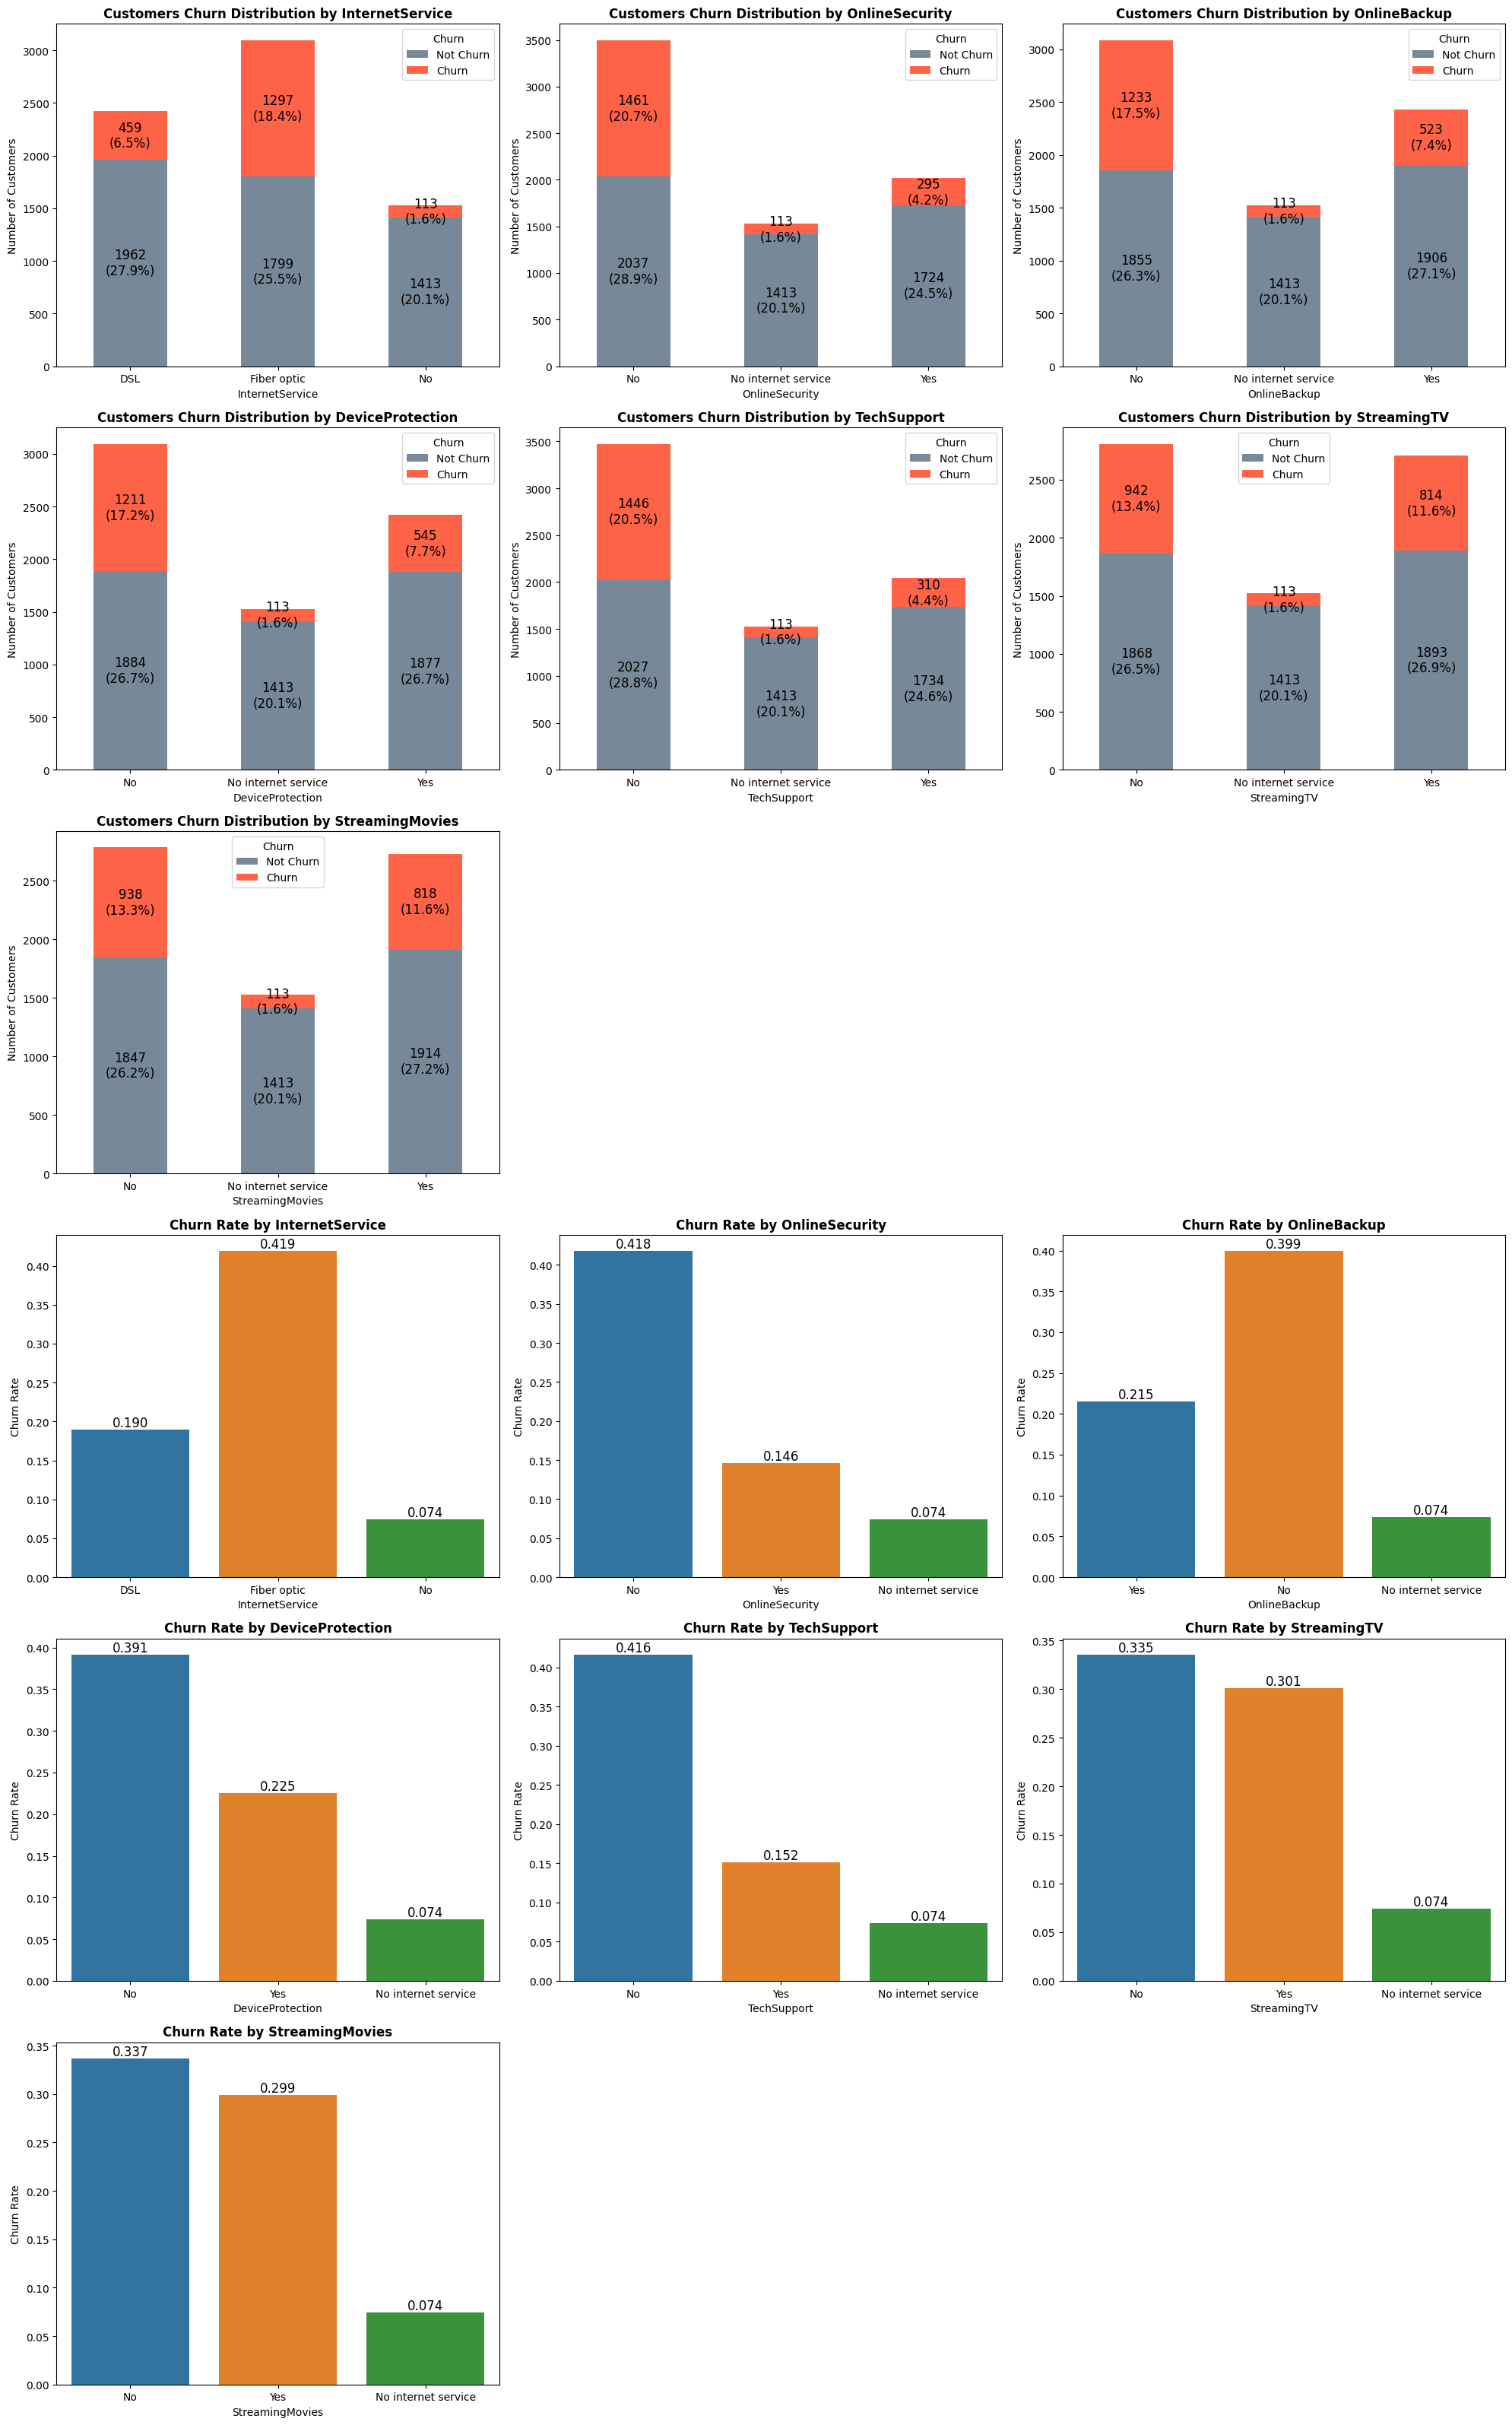

In [950]:
plt.figure(figsize=(20, 32))

col_num = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i, col in enumerate(col_num):
    plt.subplot(6, 3, i+1)
    ax = pd.crosstab(index=df[col], columns=df['Churn']).plot(kind='bar', stacked=True, color=['lightslategrey', 'tomato'], ax=plt.gca())
    plt.title(f'Customers Churn Distribution by {col}', fontweight='bold')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}\n({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=12)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=360)
    plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

    plt.subplot(6, 3, i+10)
    bar = sns.barplot(data=df, x=col, y='Churn', hue=col, errorbar=None)
    plt.title(f'Churn Rate by {col}', fontweight='bold')
    for p in bar.containers:
        bar.bar_label(p, fmt='%.3f', fontsize=12)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

As shown in the bar plot and proportion above,

Churn comparison by internet service type:
- DSL customers have a **churn rate of 19%**.  
- Fiber Optic customers have a **significantly higher churn rate of 41.9%**.
- Customers who do not subscribe to internet service have the **lowest churn rate at 7.4%**.

Impact of additional services on churn:
- **Online Security** → Customers who subscribe have a **churn rate of 14.6%**, while those who do not have a **churn rate of 41.8%**.  
- **Online Backup** → Customers who subscribe have a **churn rate of 21.5%**, whereas those who do not have a **churn rate of 39.9%**.  
- **Device Protection Plan** → Customers who subscribe have a **churn rate of 22.5%**, while non-subscribers have a **churn rate of 39.1%**.  
- **Tech Support Plan** → Customers who subscribe have a **churn rate of 15.2%**, whereas non-subscribers have a **churn rate of 41.6%**.
- **StreamingTV or Movies** → Customers who subscribe have a **churn rate of approximately 30%**, while those who do not have a **churn rate of around 33%**. The difference is not really significant.

Overall, subscribing to online security, online backup, device protection, or tech support appears to influence churn behavior, whereas having a streaming TV or movies subscription does not significantly impact churn.

> **Is there a significant difference in monthly costs or installation fees between Fiber optic and DSL?**

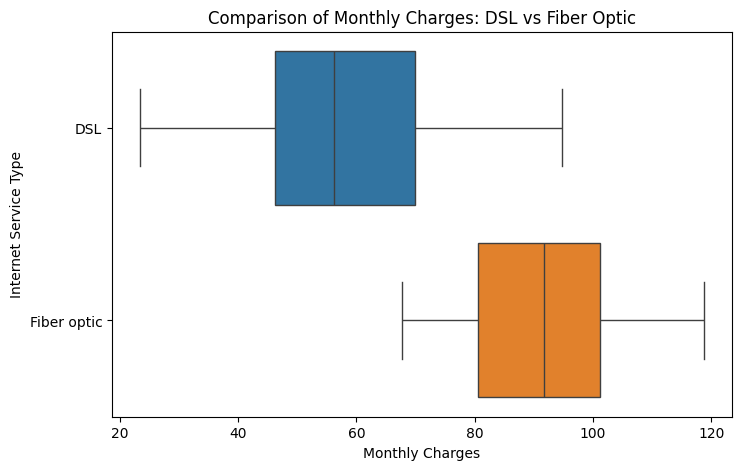

In [951]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[df['InternetService'] != 'No'], y='InternetService', x='MonthlyCharges', hue='InternetService')
plt.title("Comparison of Monthly Charges: DSL vs Fiber Optic")
plt.xlabel("Monthly Charges")
plt.ylabel("Internet Service Type")
plt.show()

**1. Higher Cost**  
   - Average Monthly Charges: 
     - Fiber Optic → $91  
     - DSL → $58
   - The **significant price difference** leads customers to switch to a cheaper alternative.  

**2. Customer Purchasing Power**  
   - Average household income in the U.S. (2017): $60,000/year or $5000/year.  
   - Middle-to-lower income groups may struggle to afford $90+ per month just for internet. 
   - If internet usage is limited to browsing, standard streaming, and online communication, DSL is sufficient without the need to pay extra for Fiber Optic.  

**Reference:**  
U.S. household income (2017): https://www.census.gov/

> **What factors cause individuals who do not subscribe to services like online security, online backup, device protection, and tech support to be more likely to churn?**

From the data, we can see that customers who do not use additional internet services tend to have a **month-to-month contract**. This type of contract is associated with a **higher churn rate** because it allows customers to leave easily without long-term commitments. Then another factor is:

- **Lack of Commitment** → Customers who only use basic internet services without additional features like `OnlineBackup` or `OnlineSecurity` tend to feel less committed. They can easily switch to another provider if there is a price change for the same service. On the other hand, if they use additional services like `OnlineBackup`, switching providers becomes more complicated, making them more likely to stay.  

- **Price Sensitivity** → Customers who subscribe only to basic plans are usually more sensitive to price. If another provider offers a lower price for the same service, they are more likely to switch quickly.  

- **Lower Sense of Security** → Using the internet without `OnlineSecurity` or `DeviceProtection` makes customers feel more vulnerable to cyber threats. They are more likely to switch to a provider that offers built-in security protection at a more affordable price.

> **How do additional services like online security, online backup, device protection, and tech support influence customer loyalty and reduce churn rate?**

**1. Online Security**  
- **Value Proposition:**  
  - Cyber threats are on the rise, and customers value protection against malware, phishing, and data breaches.  
  - Subscribing to online security gives customers peace of mind and reinforces trust in their service provider.  
- **Impact on Churn:**  
  - Enhanced security lowers the perceived risk of using the service, making customers less likely to switch providers.  

**2. Online Backup**  
- **Value Proposition:**  
  - With data being a critical asset, customers appreciate knowing their files are safely backed up in the cloud.  
  - This service protects against data loss from hardware failures, accidental deletion, or cyberattacks.  
- **Impact on Churn:**  
  - The assurance of data safety increases customer reliance on the provider, thereby reducing churn as switching becomes less attractive.  

**3. Device Protection Plan**  
- **Value Proposition:**  
  - Device repair or replacement costs can be significant; having a protection plan minimizes these unexpected expenses.  
  - It provides financial relief and convenience, ensuring that devices remain operational without incurring high costs.  
- **Impact on Churn:**  
  - Customers who benefit from lower repair/replacement costs feel they receive added value, which increases loyalty and reduces churn.  

**4. Tech Support Plan**  
- **Value Proposition:**  
  - Reliable tech support ensures that issues are resolved quickly, reducing downtime and frustration.  
  - Customers value responsive, knowledgeable assistance that helps them overcome technical problems efficiently.  
- **Impact on Churn:**  
  - Effective tech support fosters strong customer relationships and satisfaction, making them more likely to remain with the service provider.  

- Investing in additional services—**Online Security, Online Backup, Device Protection, and Tech Support**—adds significant value for customers by reducing risks and financial burdens.

#### **4.3.3 Number of Services Customers Subscribed to**

In [952]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df.insert(15, 'TotalServices', df[service_cols].apply(lambda x: x.isin(['Yes', 'DSL', 'Fiber optic']).sum(), axis=1))

In [953]:
churn_ratio = df.groupby('TotalServices')['Churn'].value_counts().unstack()
churn_ratio

Churn,0,1
TotalServices,,
1,1126,138
2,593,266
3,466,380
4,613,352
5,633,289
6,676,232
7,524,152
8,346,49
9,197,11


In [954]:
churn_ratio['ChurnRatio'] = churn_ratio[1] / (churn_ratio[0] + churn_ratio[1])

In [955]:
churn_ratio.reset_index()

Churn,TotalServices,0,1,ChurnRatio
0,1,1126,138,0.109177
1,2,593,266,0.309662
2,3,466,380,0.449173
3,4,613,352,0.364767
4,5,633,289,0.313449
5,6,676,232,0.255507
6,7,524,152,0.224852
7,8,346,49,0.124051
8,9,197,11,0.052885


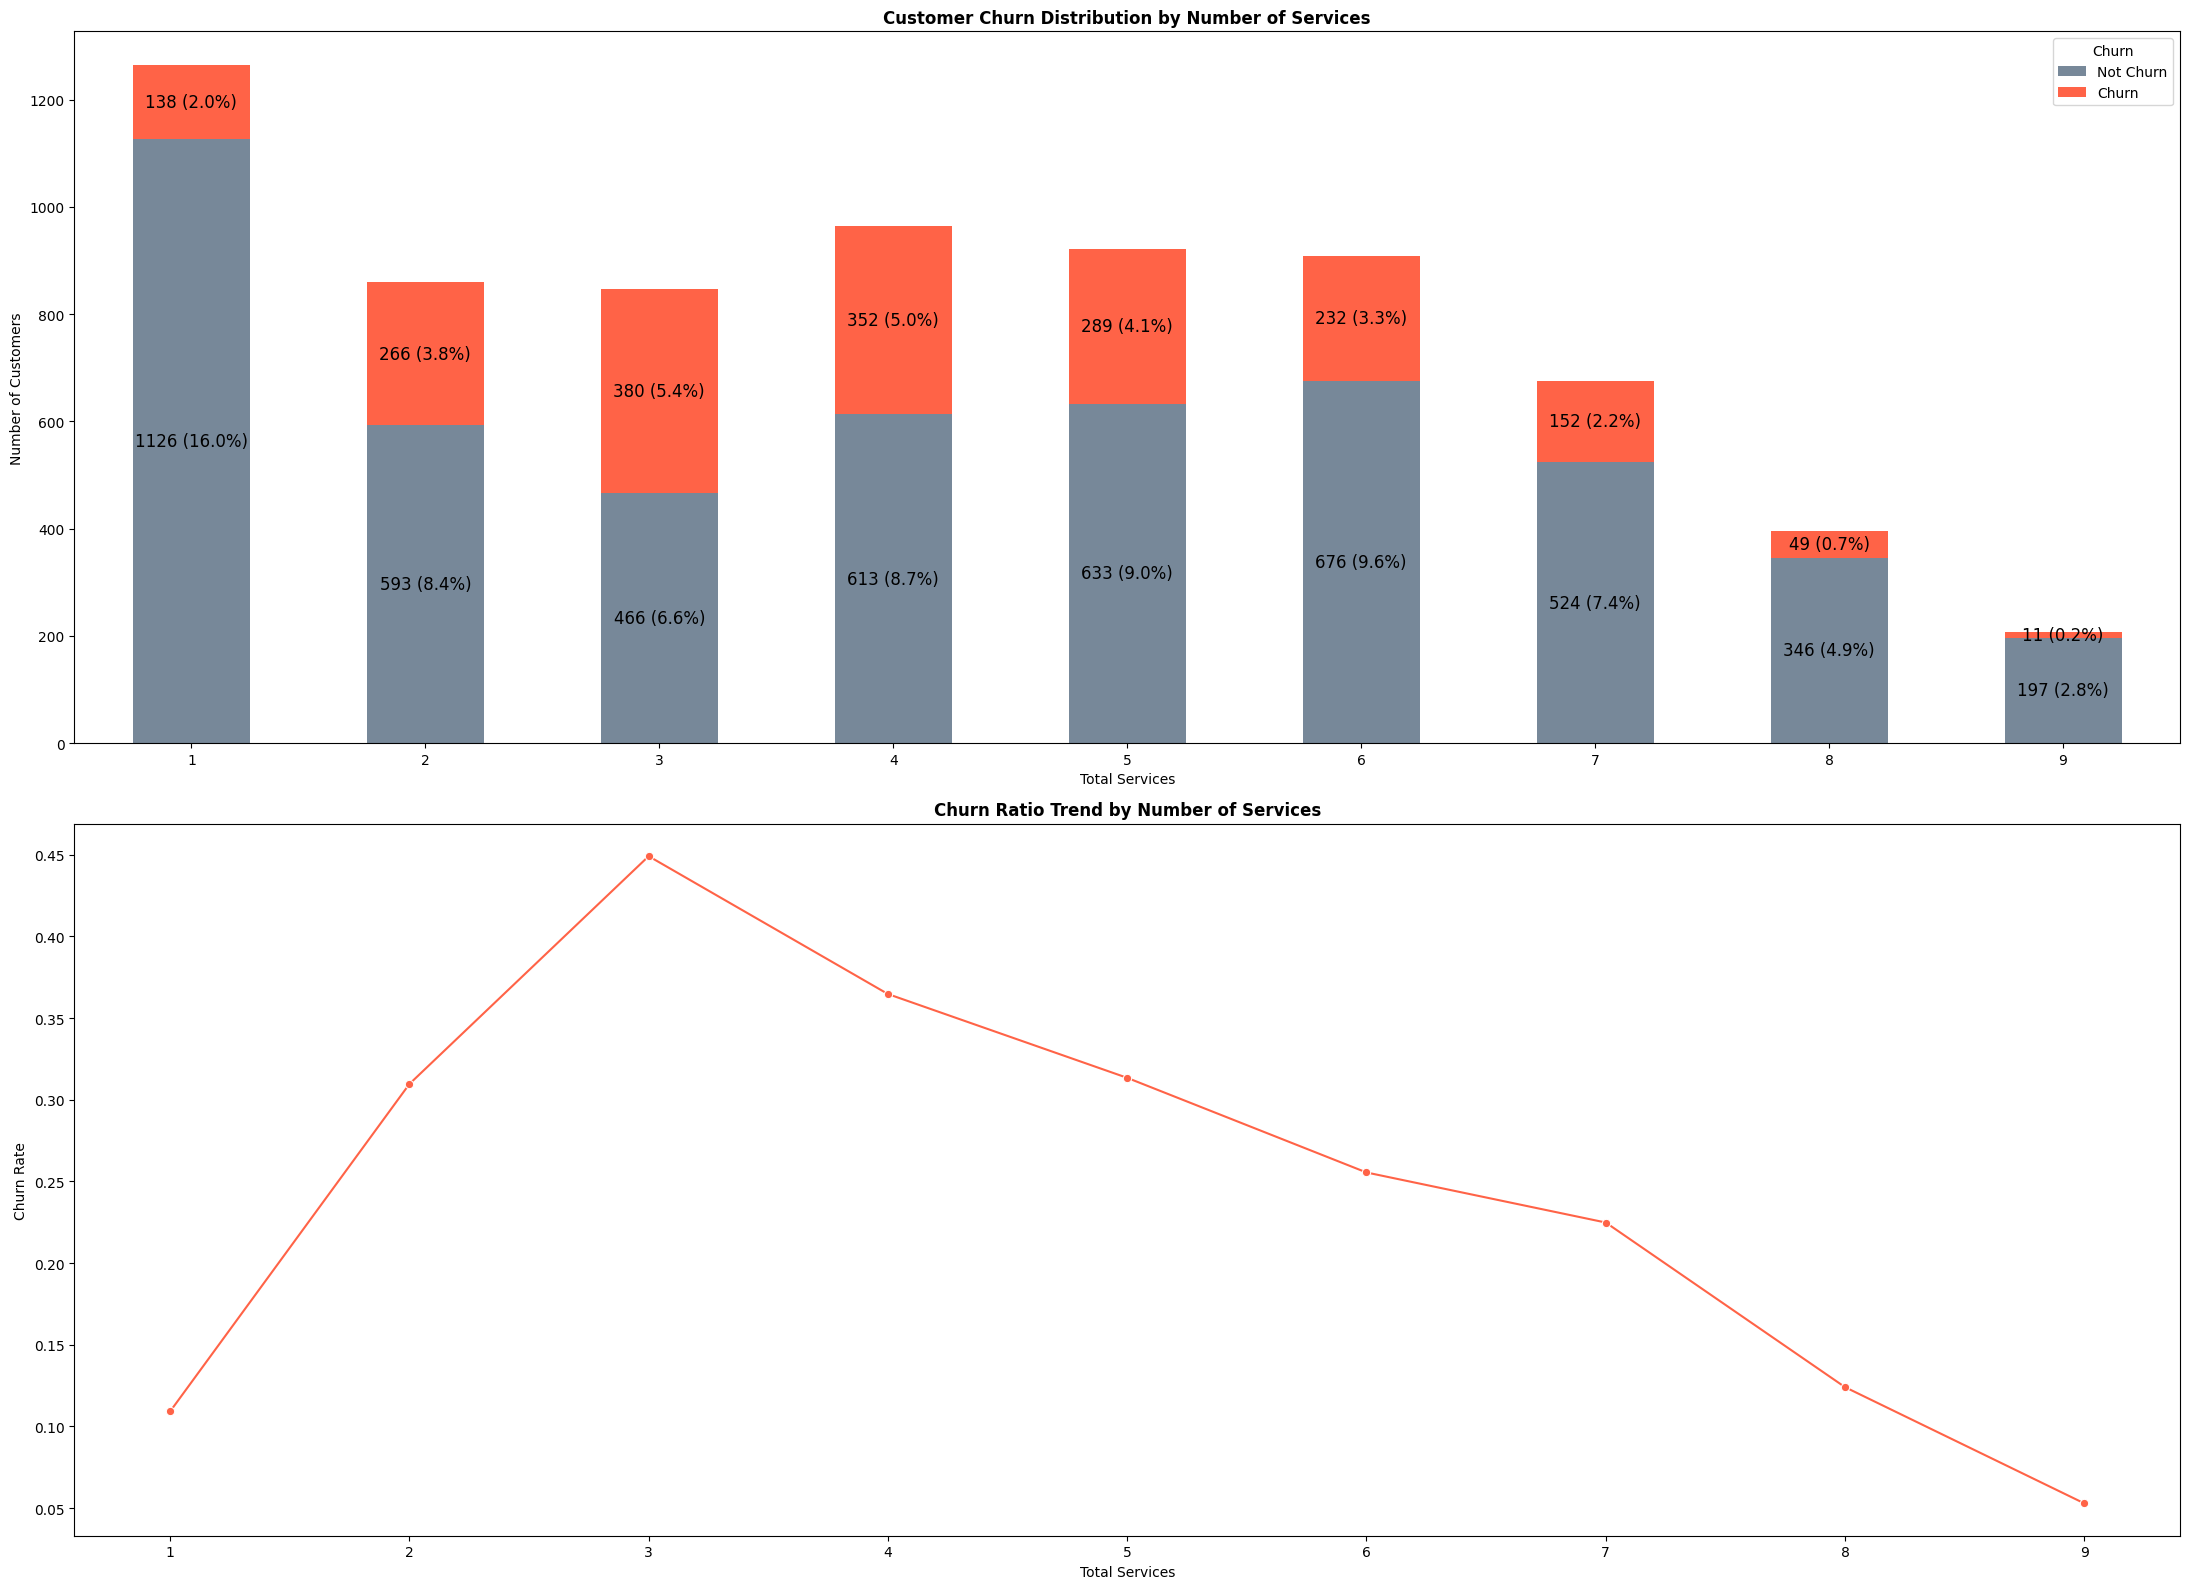

In [956]:
plt.figure(figsize=(22, 16))

plt.subplot(2,1,1)
ax = pd.crosstab(index=df['TotalServices'], columns=df['Churn']).plot(kind='bar', stacked=True, color=['lightslategrey', 'tomato'], ax=plt.gca())
plt.title(f'Customer Churn Distribution by Number of Services', fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=12)
plt.xlabel('Total Services')
plt.ylabel('Number of Customers')
plt.xticks(rotation=360)
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

plt.subplot(2,1,2)
sns.lineplot(data=churn_ratio, x='TotalServices', y='ChurnRatio', marker='o', color='tomato', ax=plt.gca())
plt.title(f'Churn Ratio Trend by Number of Services', fontweight='bold')
plt.xlabel('Total Services')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

- **Highest Churn at 3 Services** → Churn rate peaks (~45%) when customers have 3 services.
- **Churn Decreases as Services Increase** → Customers with more than 3 services show lower churn, dropping to ~5% at 9 services.
- **Low Churn with 1 Service** → Customers with only 1 service have a relatively low churn rate (~11%).

In [957]:
df_3_services = df[df['TotalServices'] == 3]

df_3_services['Service_Combination'] = df_3_services[service_cols].apply(lambda row: ', '.join(row.index[row.isin(['Yes', 'DSL', 'Fiber optic'])]), axis=1)
df_3_services['Service_Combination'].value_counts()

Service_Combination
PhoneService, MultipleLines, InternetService          210
PhoneService, InternetService, OnlineSecurity          97
PhoneService, InternetService, OnlineBackup            93
PhoneService, InternetService, StreamingTV             93
PhoneService, InternetService, StreamingMovies         83
PhoneService, InternetService, DeviceProtection        69
PhoneService, InternetService, TechSupport             57
InternetService, StreamingTV, StreamingMovies          21
InternetService, OnlineSecurity, TechSupport           20
InternetService, OnlineBackup, TechSupport             14
InternetService, DeviceProtection, TechSupport         11
InternetService, OnlineSecurity, DeviceProtection      11
InternetService, OnlineBackup, DeviceProtection         9
InternetService, OnlineSecurity, OnlineBackup           9
InternetService, OnlineBackup, StreamingMovies          8
InternetService, OnlineBackup, StreamingTV              7
InternetService, OnlineSecurity, StreamingTV        

In [958]:
churn_rates = df_3_services.groupby('Service_Combination')['Churn'].mean().reset_index()
churn_rates.sort_values(by='Churn', ascending=False)

,Service_Combination,Churn
1,"InternetService, DeviceProtection, StreamingTV",0.714286
0,"InternetService, DeviceProtection, StreamingMo...",0.666667
19,"PhoneService, InternetService, StreamingTV",0.655914
18,"PhoneService, InternetService, StreamingMovies",0.578313
5,"InternetService, OnlineBackup, StreamingTV",0.571429
21,"PhoneService, MultipleLines, InternetService",0.566667
15,"PhoneService, InternetService, DeviceProtection",0.478261
12,"InternetService, StreamingTV, StreamingMovies",0.476190
9,"InternetService, OnlineSecurity, StreamingMovies",0.400000
14,"InternetService, TechSupport, StreamingTV",0.400000


In [959]:
df_3_services[df_3_services['Service_Combination'] == 'InternetService, DeviceProtection, StreamingTV']['MonthlyCharges'].median()

39.85

In [960]:
df_3_services[df_3_services['Service_Combination'] == 'InternetService, DeviceProtection, StreamingTV']['Contract'].value_counts(normalize=True)

Contract
Month-to-month    0.714286
One year          0.285714
Name: proportion, dtype: float64

- **Flexible Month-to-Month Contracts**  
   - **71.4% of customers use monthly contracts**, allowing them to switch providers easily without penalties.  
   - U.S. households tend to prefer flexible contracts to avoid long-term commitments (FCC, 2017).

- **Price Sensitivity & Lack of Added Value**  
   - **The average cost of $39.81** is mid-range, but customers without TechSupport or OnlineSecurity may feel they are not getting enough value compared to competitors offering **better security features at similar prices**.  
   - This encourages them to seek **cheaper or more valuable alternatives**.

- **StreamingTV as a Non-Essential Service**  
   - **StreamingTV is not a primary necessity**, making it easier for customers to cancel if they have other financial priorities.

**Conclusion**  
A flexible **contract**, **mid-range pricing without added value**, and StreamingTV as a **non-essential service** make customers more likely to switch providers.

#### **4.3.4 Internet Extras Bundling**

In [961]:
int_extras = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df.insert(15, 'InternetExtras', df[int_extras].apply(lambda x: x.isin(['Yes']).sum(), axis=1))

In [962]:
churn_ratio_int = df.groupby('InternetExtras')['Churn'].value_counts().unstack()
churn_ratio_int

Churn,0,1
InternetExtras,,
0,1744,475
1,524,442
2,663,370
3,812,306
4,662,190
5,500,71
6,269,15


In [963]:
churn_ratio_int['ChurnRatio'] = churn_ratio_int[1] / (churn_ratio_int[0] + churn_ratio_int[1])
churn_ratio_int

Churn,0,1,ChurnRatio
InternetExtras,,,
0,1744,475,0.214060
1,524,442,0.457557
2,663,370,0.358180
3,812,306,0.273703
4,662,190,0.223005
5,500,71,0.124343
6,269,15,0.052817


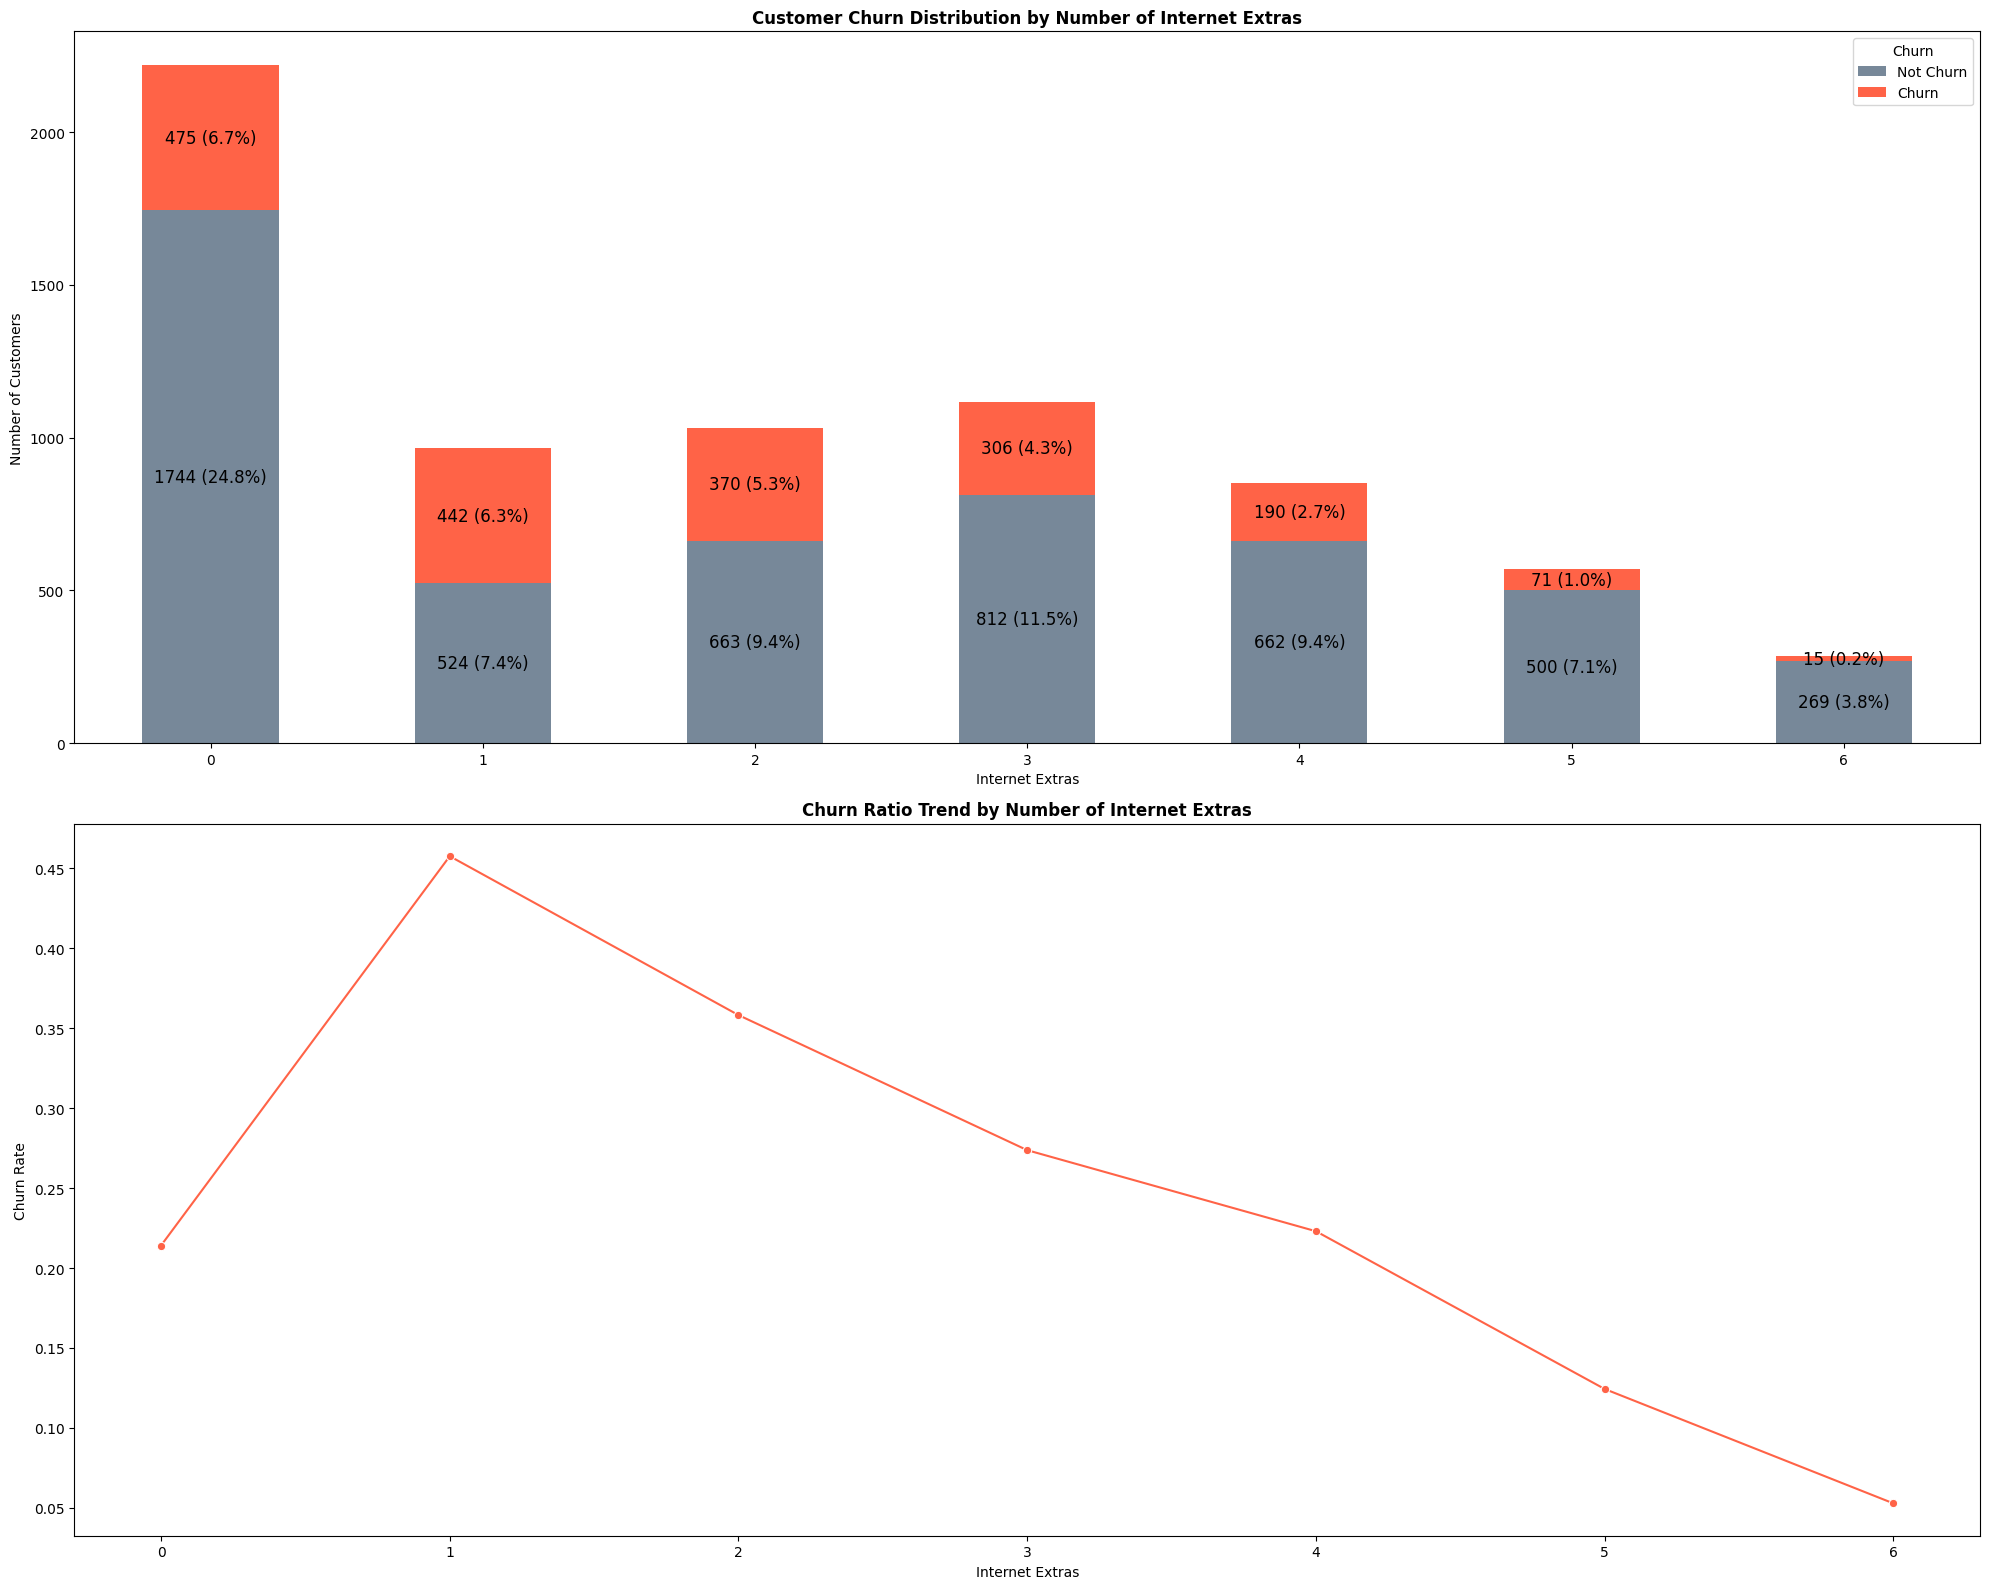

In [964]:
plt.figure(figsize=(20, 16))

plt.subplot(2,1,1)
ax = pd.crosstab(index=df['InternetExtras'], columns=df['Churn']).plot(kind='bar', stacked=True, color=['lightslategrey', 'tomato'], ax=plt.gca())
plt.title(f'Customer Churn Distribution by Number of Internet Extras', fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=12)
plt.xlabel('Internet Extras')
plt.ylabel('Number of Customers')
plt.xticks(rotation=360)
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

plt.subplot(2,1,2)
sns.lineplot(data=churn_ratio_int, x='InternetExtras', y='ChurnRatio', marker='o', color='tomato', ax=plt.gca())
plt.title(f'Churn Ratio Trend by Number of Internet Extras', fontweight='bold')
plt.xlabel('Internet Extras')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

Customers with only one additional internet service have the highest churn rates with approximately 45%. Additionally, as the number of internet extras increases, the churn rate generally decreases. Customers with 4-6 extra services show significantly lower churn numbers.

In [965]:
df_int_services = df[df['InternetExtras'] == 1]

df_int_services['Service_Combination'] = df_int_services[int_extras].apply(lambda row: ', '.join(row.index[row.isin(['Yes'])]), axis=1)
df_int_services['Service_Combination'].value_counts()

Service_Combination
OnlineBackup        209
StreamingMovies     185
OnlineSecurity      175
StreamingTV         171
DeviceProtection    124
TechSupport         102
Name: count, dtype: int64

In [966]:
churn_rates_int = df_int_services.groupby('Service_Combination')['Churn'].mean().reset_index()
churn_rates_int.sort_values(by='Churn', ascending=False)

,Service_Combination,Churn
3,StreamingMovies,0.648649
4,StreamingTV,0.614035
0,DeviceProtection,0.451613
1,OnlineBackup,0.392344
2,OnlineSecurity,0.297143
5,TechSupport,0.264706


Customers who subscribe to streaming services as their only additional service have a higher churn rate (~60%) compared to those who do not. This could be because streaming is often considered a non-essential expense, making it more likely to be cut when individuals face financial constraints. In such situations, they may reprioritize their spending, reallocating funds from subscriptions to more pressing needs.

### **4.4 Analysis by Account Information**

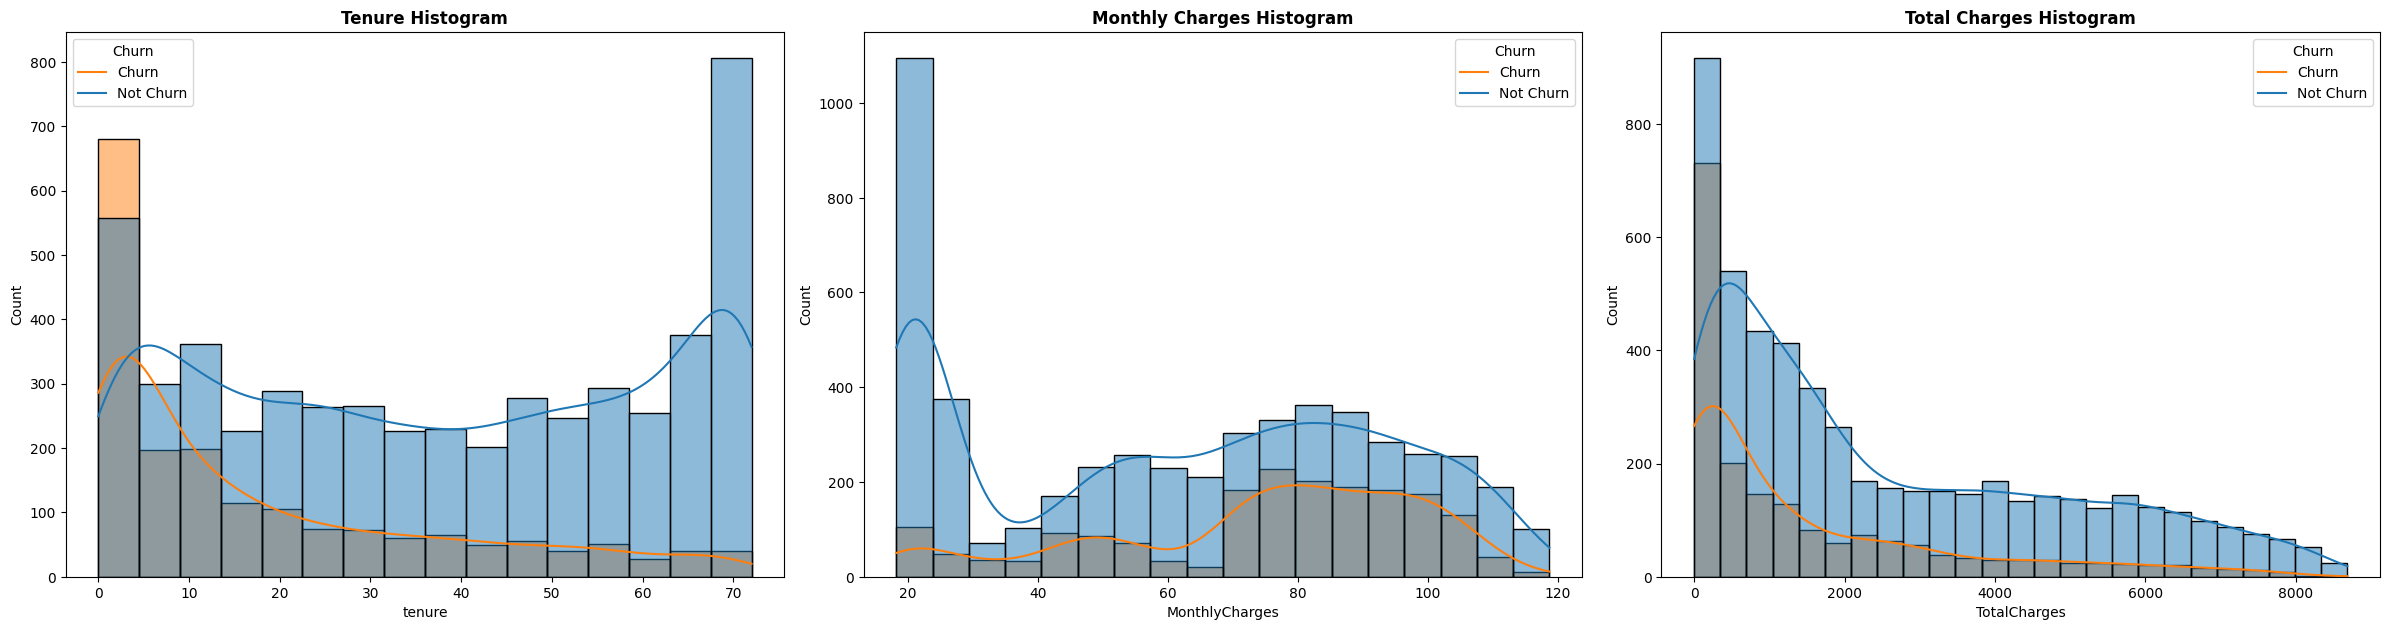

In [967]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title('Tenure Histogram', fontweight='bold')
sns.histplot(x=df['tenure'], hue=df['Churn'], kde=True)
plt.legend(title='Churn', labels=['Churn', 'Not Churn'])

plt.subplot(2,3,2)
plt.title('Monthly Charges Histogram', fontweight='bold')
sns.histplot(x=df['MonthlyCharges'], hue=df['Churn'], kde=True)
plt.legend(title='Churn', labels=['Churn', 'Not Churn'])

plt.subplot(2,3,3)
plt.title('Total Charges Histogram', fontweight='bold')
sns.histplot(x=df['TotalCharges'], hue=df['Churn'], kde=True)
plt.legend(title='Churn', labels=['Churn', 'Not Churn'])

plt.tight_layout()
plt.show()

As seen from the histplot:
- Customers with **short tenure** are more likely to churn.
- Customers with **high monthly charges** tend to churn.
- **Total charges** are lower for customers who churn.

> Contract, Paperless Billing, Payment

In [968]:
for i in ['Contract', 'PaperlessBilling', 'PaymentMethod']:
    display(df.groupby(i)['Churn'].value_counts(normalize=True))

Contract        Churn
Month-to-month  0        0.572903
                1        0.427097
One year        0        0.887305
                1        0.112695
Two year        0        0.971681
                1        0.028319
Name: proportion, dtype: float64

PaperlessBilling  Churn
No                0        0.836699
                  1        0.163301
Yes               0        0.664349
                  1        0.335651
Name: proportion, dtype: float64

PaymentMethod              Churn
Bank transfer (automatic)  0        0.832902
                           1        0.167098
Credit card (automatic)    0        0.847569
                           1        0.152431
Electronic check           0        0.547146
                           1        0.452854
Mailed check               0        0.808933
                           1        0.191067
Name: proportion, dtype: float64

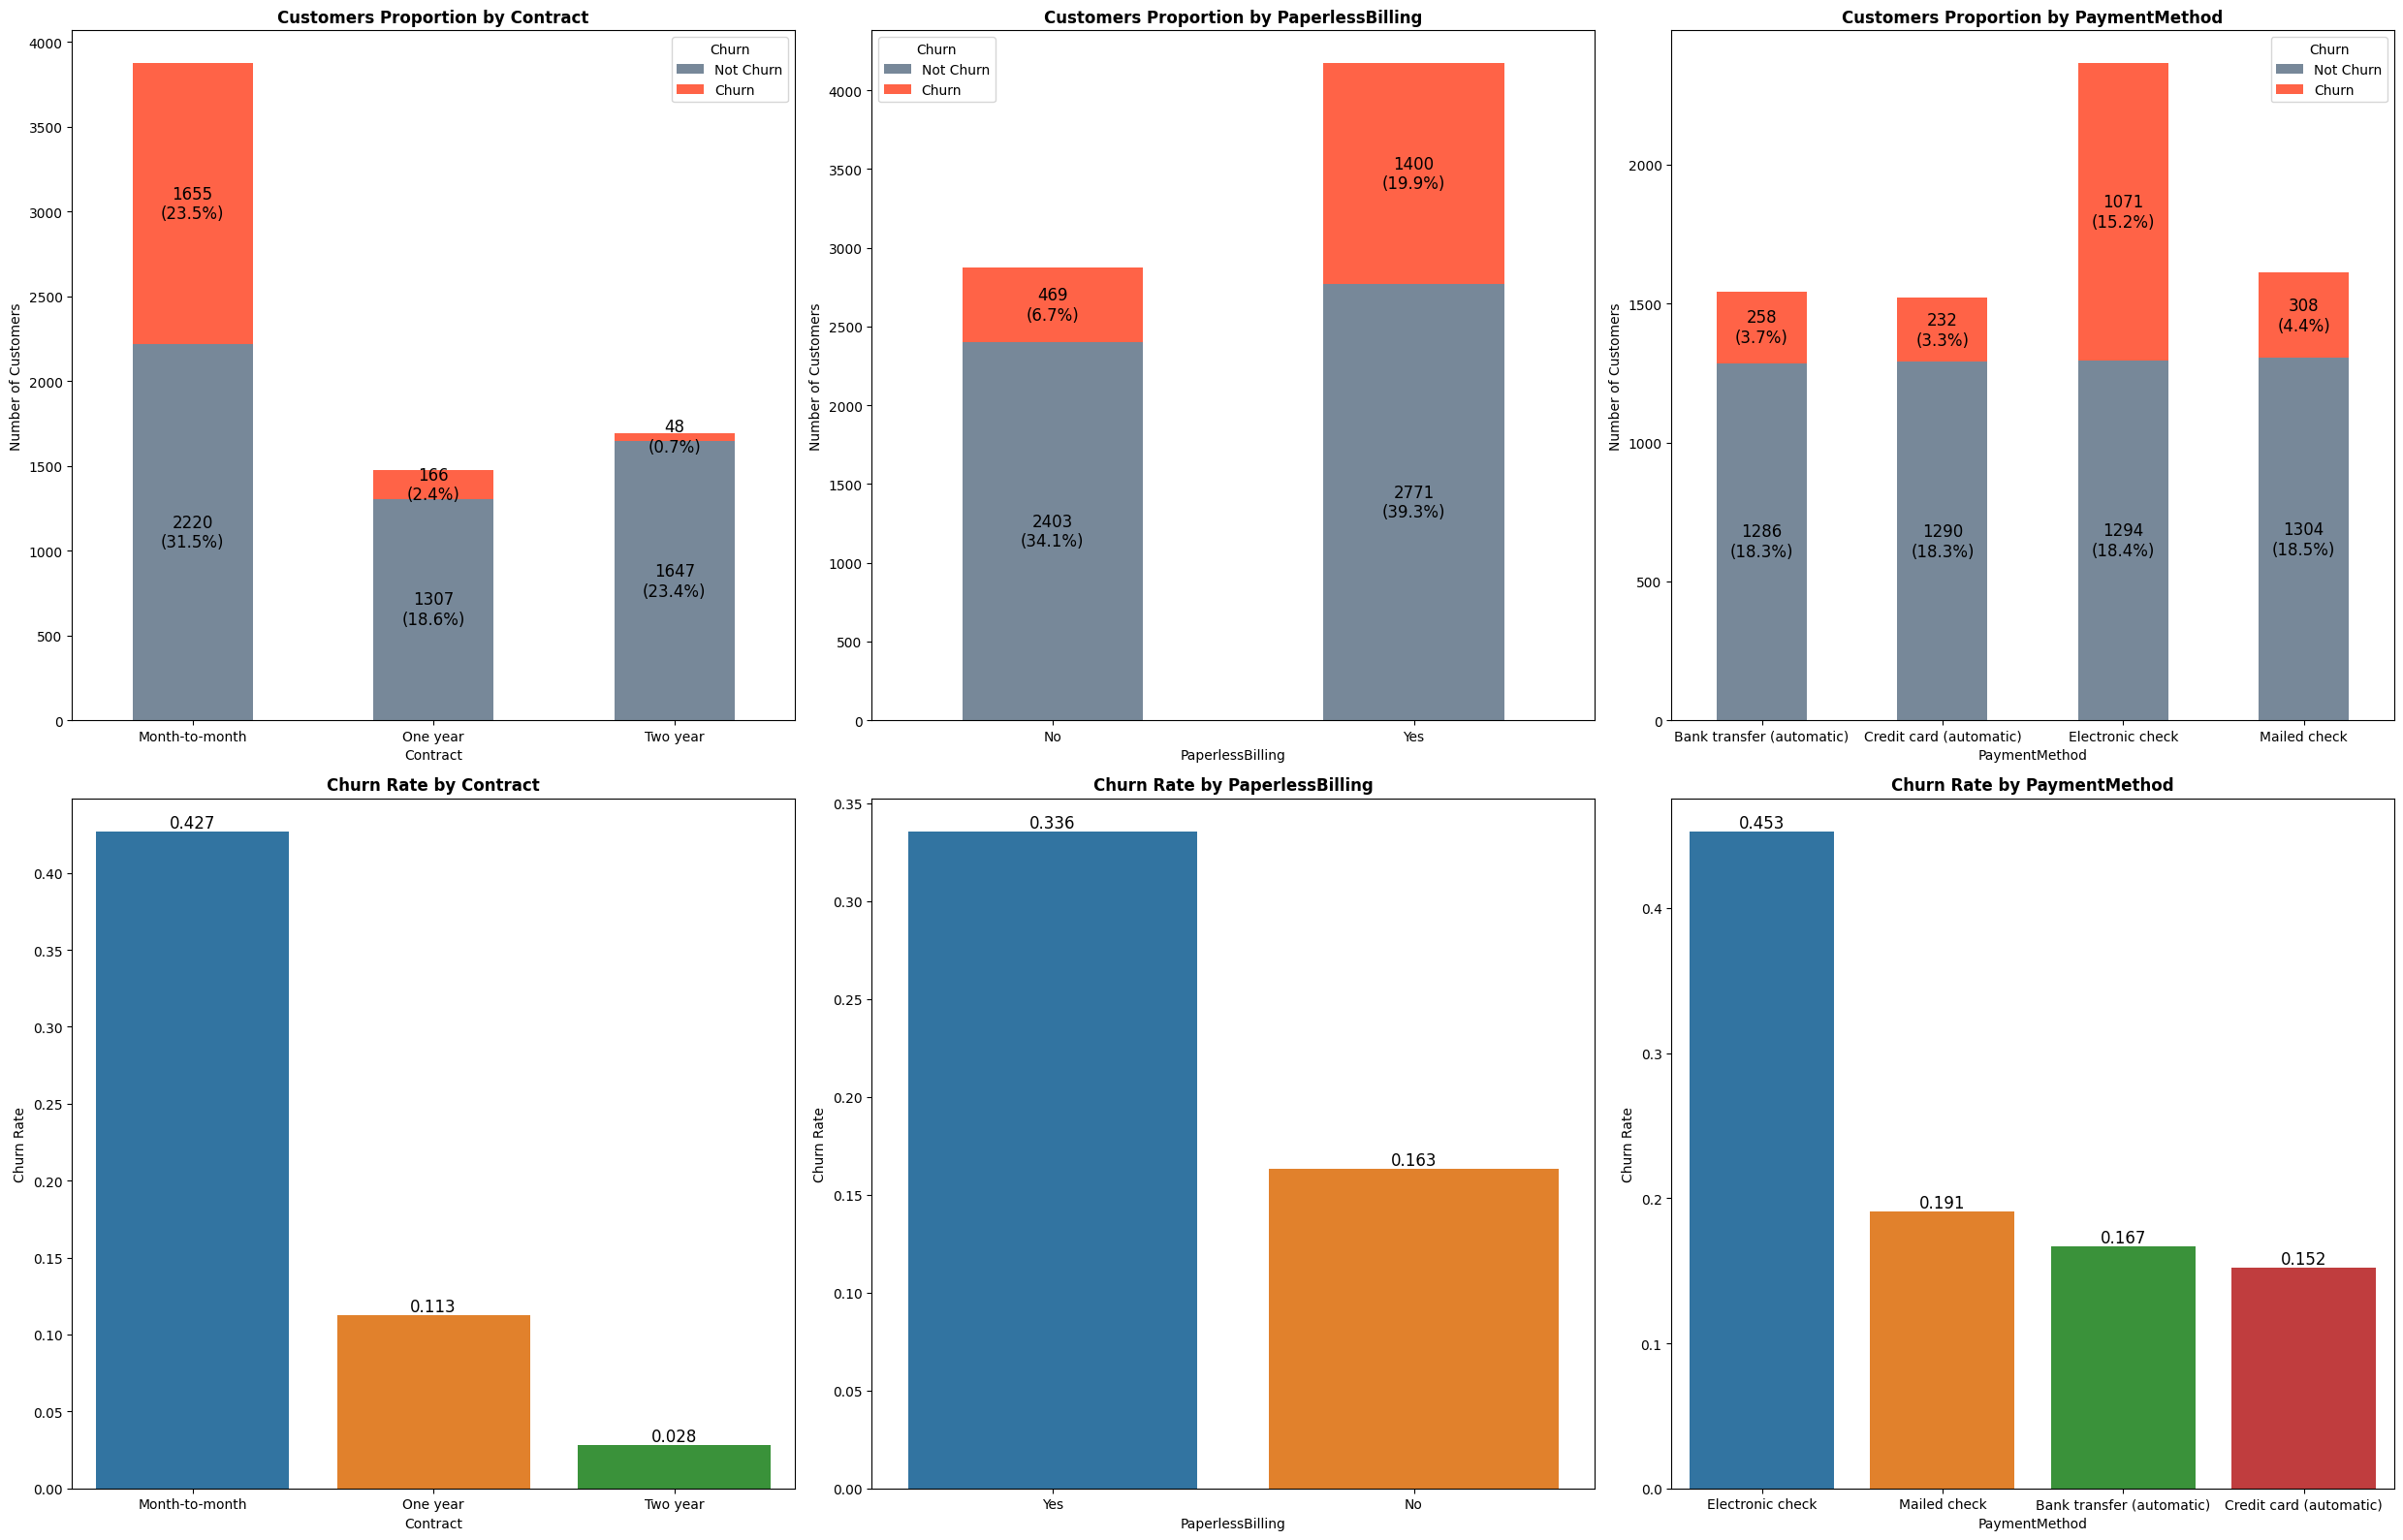

In [969]:
plt.figure(figsize=(25, 16))

col_num = ['Contract', 'PaperlessBilling', 'PaymentMethod']

for i, col in enumerate(col_num):
    plt.subplot(2, 3, i+1)
    ax = pd.crosstab(index=df[col], columns=df['Churn']).plot(kind='bar', stacked=True, color=['lightslategrey', 'tomato'], ax=plt.gca())
    plt.title(f'Customers Proportion by {col}', fontweight='bold')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}\n({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=12)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=360)
    plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

    plt.subplot(2, 3, i+4)
    bar = sns.barplot(data=df, x=col, y='Churn', hue=col, errorbar=None)
    plt.title(f'Churn Rate by {col}', fontweight='bold')
    for p in bar.containers:
        bar.bar_label(p, fmt='%.3f', fontsize=12)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

As we can see from the bar plot and proportion above, contract, paperless billing, or payment method might have influences churn behavior.
- Customers with month-to-month contract have the highest churn rate with 42.7%, followed by one year contract with 11.3%, then two year contract with 2.8%. This suggests that those with monthly contract are more likely to leave since they have no long-term commitment.
- Customers who opt for paperless billing have a higher churn rate with 33.6%, while those who don't use paperless billing have a lower churn rate with 16.3%.
- Customers who pay with electronic check have the highest churn rate with 45.3%, suggesting that they may face payment difficulties or dissatisfaction. Additionally, customers who chose mailed check have a churn rate of 19.1%, while automatic payment users have the lowest churn rates, around 16%.

> **What are the key factors that cause customers with month-to-month contracts, paperless billing, or electronic check payment methods to be more likely to churn?**

- **Contract**
    - **No Early Termination Fee (ETF)** → Customers with **month-to-month contracts are not subject to early termination fees**, allowing them to switch providers at any time without financial consequences. In contrast, customers with **1- & 2-year contracts face penalties if they cancel early**. This financial commitment makes long-term contract customers more likely to stay.
    - **Price Sensitivity** → Month-to-month customers have the flexibility to choose services freely, making them more likely to **switch to competitors offering lower prices or better promotions**. Without a long-term commitment, cost becomes a major factor in their decision-making.
    - **Dynamic Customer Profiles** → Many **month-to-month customers belong to more mobile segments**, such as students, temporary workers, or individuals trying out the service. This group tends to lack long-term loyalty to a single provider, making them more prone to switching based on changing needs.

- **Paperless Billing**
    - **More Tech-Savvy → Easier to Compare & Switch**
Like online shopping, **paperless billing** customers are more tech-savvy and can easily find better deals, making them more likely to churn.
    - **Less Attachment → No Physical Reminder**  
Like a digital calendar vs. a paper planner, **paperless billing** customers don’t get physical bill reminders, reducing their engagement with the service.
    - **Perceived Reliability → Digital Feels Less "Real"**  
Like e-tickets vs. physical tickets, some customers see paper bills as more official and trustworthy, increasing their loyalty.

- **Payment Method**
    - **Late Payments & Penalties** – If customers forget to write or send a check on time, they may face late fees or even service termination.
    - **Payment Failure** – If the account balance is insufficient when the check is processed, the payment will fail, requiring additional effort to resolve.
    - **Technical Errors** – Incorrectly entered account numbers or other details can lead to delayed or lost payments.

**Conclusion:**  
- **Month-to-month contracts** make it easier for customers to leave, as they are **not bound by early termination fees** and **do not feel committed** to staying.  
- **Paperless billing customers** are more flexible and prone to switching due to their **tech-savviness, lower engagement, and the perception that digital bills feel less tangible**.  
- The combination of **electronic check issues** and **inadequate customer support** increases frustration and leads to **higher customer churn at AT&T**.  


reference : https://www.att.com/support/article/wireless/KM1253555/

https://www.consumeraffairs.com/cell_phones/att_wireless.htm

### **4.5 Analysis by Financial**

In [970]:
display(df.pivot_table(index='TotalServices', columns='Contract', values='MonthlyCharges'), df.pivot_table(index='TotalServices', columns='Contract', values='TotalCharges'))

Contract,Month-to-month,One year,Two year
TotalServices,,,
1,20.637342,20.030492,19.944458
2,51.309462,28.802410,25.452954
3,63.500462,46.743571,44.047222
4,72.916231,60.844048,52.809286
5,83.608583,72.359048,64.512946
6,92.164603,84.643393,76.098750
7,100.437376,94.737832,87.109476
8,104.708065,101.120000,97.211623
9,115.100000,111.498077,103.261080


Contract,Month-to-month,One year,Two year
TotalServices,,,
1,175.587613,537.043934,904.177586
2,426.209555,1156.327108,1385.427215
3,770.698681,1653.909286,2179.802778
4,1341.955433,2301.585417,2840.820714
5,1954.561417,3166.545238,3648.308482
6,2766.289720,4091.043036,4443.511250
7,3701.784653,4967.738053,5451.985887
8,4526.503226,5747.962381,6388.920175
9,5688.475000,6466.482692,7066.126989


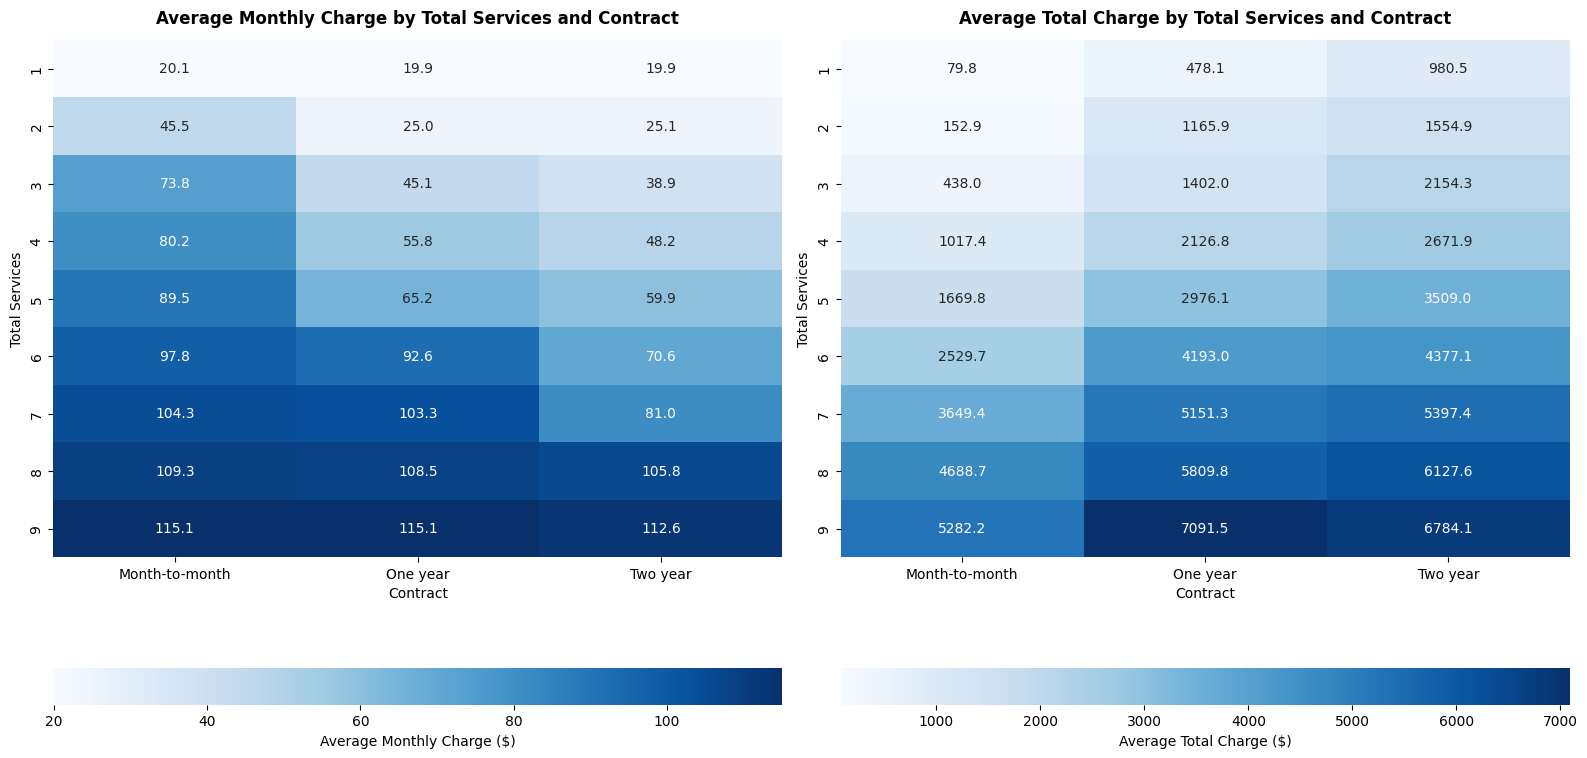

In [971]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Average Monthly Charge by Total Services and Contract', fontweight='bold', pad=12)
sns.heatmap(data=df.pivot_table(index='TotalServices', columns='Contract', values='MonthlyCharges', aggfunc='median'), cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label':'Average Monthly Charge ($)', 'orientation':'horizontal'})
plt.ylabel('Total Services')

plt.subplot(1,2,2)
plt.title('Average Total Charge by Total Services and Contract', fontweight='bold', pad=12)
sns.heatmap(data=df.pivot_table(index='TotalServices', columns='Contract', values='TotalCharges', aggfunc='median'), cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label':'Average Total Charge ($)', 'orientation':'horizontal'})
plt.ylabel('Total Services')

plt.tight_layout()
plt.show()

The heatmap above indicates that customers using more services tend to have higher monthly charges. The monthly charge increases as the  number of services increases, regardless of the contract type. Additionally, for the same number of services, those with longer contract generally pay less compared to those on monthly contract.
- More services -> higher charges
- Longer contract -> lower charges

Although customers with longer contract pay a lower monthly charge, their total charge over time is the highest. This makes sense because they remain subscribed for a longer period, accumulating more payments. Additionally, customers with more services consistently pay more, both in terms of monthly and total charges. This suggests that while long-term contract offer lower monthly charges, they result in higher overall spending due to the extended commitment.

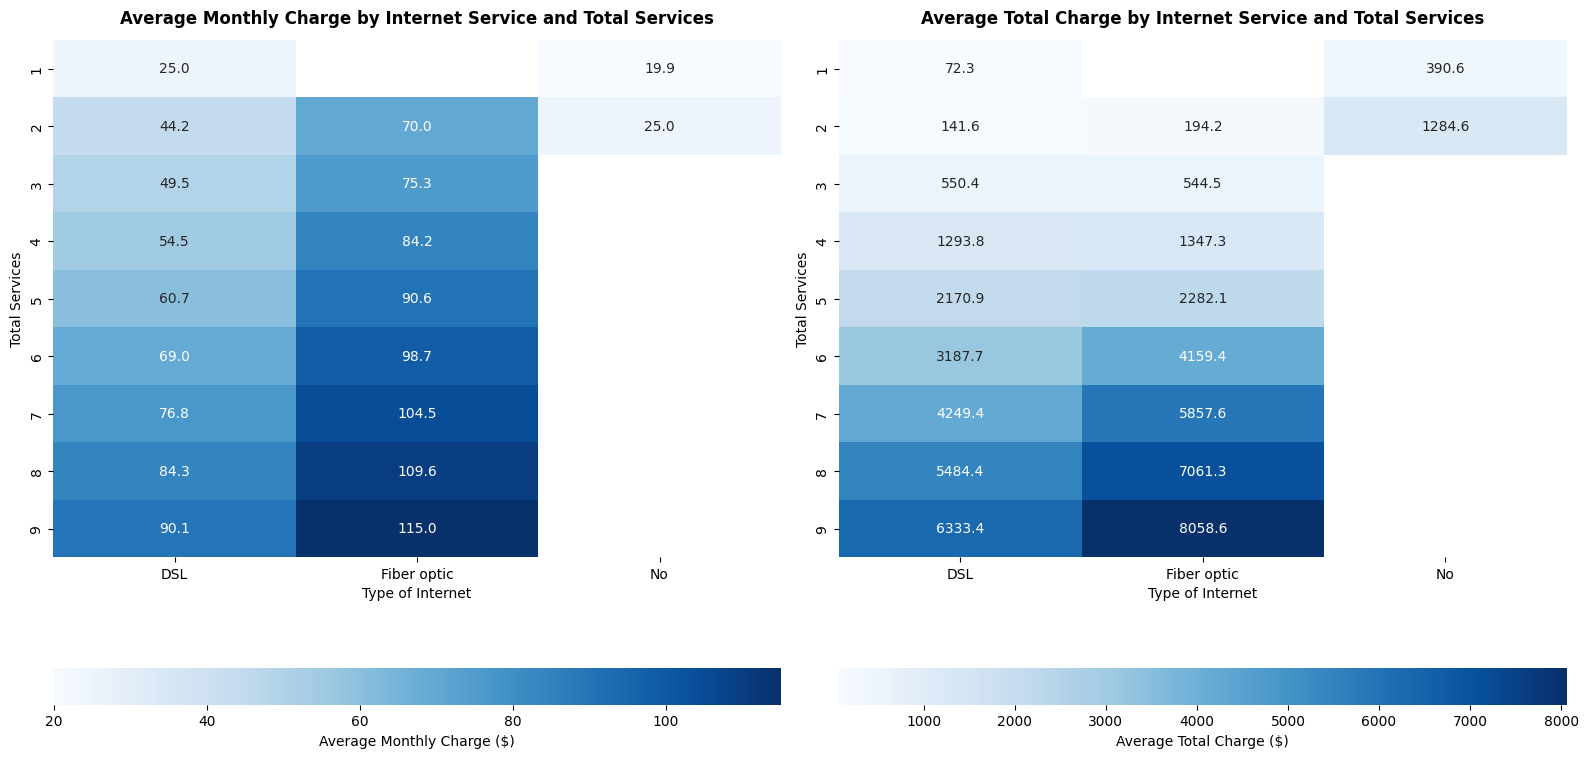

In [972]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Average Monthly Charge by Internet Service and Total Services', fontweight='bold', pad=12)
sns.heatmap(data=df.pivot_table(index='TotalServices', columns='InternetService', values='MonthlyCharges', aggfunc='median'), cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label':'Average Monthly Charge ($)', 'orientation':'horizontal'})
plt.xlabel('Type of Internet')
plt.ylabel('Total Services')

plt.subplot(1,2,2)
plt.title('Average Total Charge by Internet Service and Total Services', fontweight='bold', pad=12)
sns.heatmap(data=df.pivot_table(index='TotalServices', columns='InternetService', values='TotalCharges', aggfunc='median'), cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label':'Average Total Charge ($)', 'orientation':'horizontal'})
plt.xlabel('Type of Internet')
plt.ylabel('Total Services')

plt.tight_layout()
plt.show()

Both monthly charges and total charges are consistently higher for customers with fiber optic compared to DSL. This indicates that fiber optic may be priced higher than DSL since the cables are expensive and building out the network and infrastructure takes a significant investment ([reference](https://updater.com/guides/dsl-vs-fiber)). Additionally, as the number of total services increases, both monthly and total charges also increase across all internet types. This confirms that customers subscribing to more services pay more, reinforcing the importance of service bundling strategies.

### **4.6 Customer Segmentation**

In this section, we will segment the customers based on their tenure and total charges.

We will divide the tenure into four segments; customers with tenure of 0-6 months will be segmented as New Customer, those with tenure of 6-12 months as Growing Customer, those with tenure of 12-36 months as Mid-term Customer, and those with tenure of more than 36 months as Long-term customer.
- New customer: [0-6]
- Growing customer: (6-12]
- Mid-term customer: (12-36]
- Long-term customer: (36-72]

In [973]:
print(f'{[-np.inf] + np.percentile(df['TotalCharges'], [33,66]).tolist() + [df['TotalCharges'].max()]}')

[-inf, 662.9080000000001, 2656.0060000000003, 8684.8]


For the total charges, we will divide it into three segments, Low Spender, Mid Spender, and High Spender using percentile.
- Low spender: [0, 670]
- Mid spender: (670, 2656]
- High spender: (2656, 8684.8]

In [974]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetExtras,TotalServices,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,1,2,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,2,4,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,2,4,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,3,4,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [975]:
df.shape

(7043, 23)

In [976]:
df.insert(6, 'SegmentTenure', pd.cut(df['tenure'], bins=[-np.inf, 6, 12, 36, df['tenure'].max()], labels=['New', 'Growing', 'Mid-term', 'Long-term']))

In [977]:
df.insert(23, 'SegmentCharges', pd.cut(df['TotalCharges'], bins=[-np.inf, 670, 2656, df['TotalCharges'].max()], labels=['Low spender', 'Mid spender', 'High spender']))

In [978]:
df.insert(24, 'CustomerSegment', df['SegmentTenure'].astype(str) + '-' +  df['SegmentCharges'].astype(str))

In [979]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,SegmentTenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetExtras,TotalServices,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SegmentCharges,CustomerSegment,Churn
0,7590-VHVEG,Female,No,Yes,No,1,New,No,No phone service,DSL,No,Yes,No,No,No,No,1,2,Month-to-month,Yes,Electronic check,29.85,29.85,Low spender,New-Low spender,0
1,5575-GNVDE,Male,No,No,No,34,Mid-term,Yes,No,DSL,Yes,No,Yes,No,No,No,2,4,One year,No,Mailed check,56.95,1889.50,Mid spender,Mid-term-Mid spender,0
2,3668-QPYBK,Male,No,No,No,2,New,Yes,No,DSL,Yes,Yes,No,No,No,No,2,4,Month-to-month,Yes,Mailed check,53.85,108.15,Low spender,New-Low spender,1
3,7795-CFOCW,Male,No,No,No,45,Long-term,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,3,4,One year,No,Bank transfer (automatic),42.30,1840.75,Mid spender,Long-term-Mid spender,0
4,9237-HQITU,Female,No,No,No,2,New,Yes,No,Fiber optic,No,No,No,No,No,No,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Low spender,New-Low spender,1


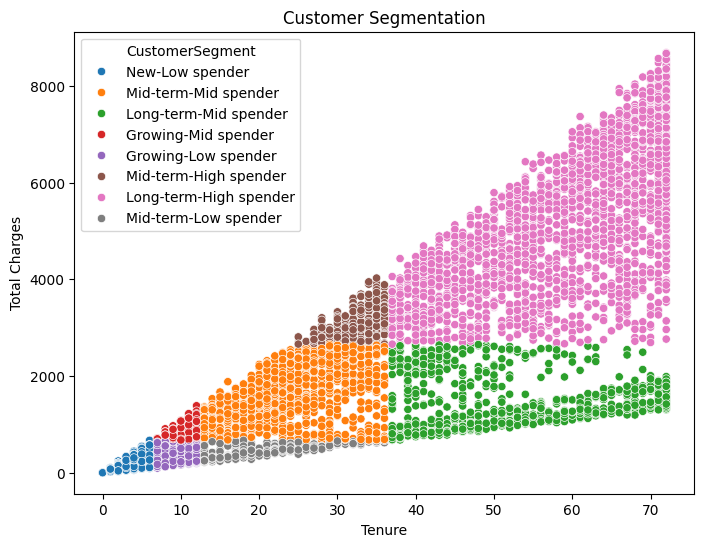

In [980]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['tenure'], y=df['TotalCharges'], hue=df['CustomerSegment'])
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Customer Segmentation')
plt.show()

The customers are divided into eight segments, with the Long-term-High Spender group having the largest number of customers.

In [981]:
ct = pd.crosstab(index=df['CustomerSegment'], columns=df['Churn'])
ct['ChurnRate'] = ct[1]/(ct[0]+ct[1])
ct

Churn,0,1,ChurnRate
CustomerSegment,,,
Growing-Low spender,351,115,0.246781
Growing-Mid spender,101,138,0.577406
Long-term-High spender,1852,318,0.146544
Long-term-Mid spender,791,40,0.048135
Mid-term-High spender,144,81,0.360000
Mid-term-Low spender,370,22,0.056122
Mid-term-Mid spender,868,371,0.299435
New-Low spender,697,784,0.529372


In [982]:
ct_sorted = ct.sort_values('ChurnRate', ascending=False).drop(columns='ChurnRate')
ct_sorted

Churn,0,1
CustomerSegment,,
Growing-Mid spender,101,138
New-Low spender,697,784
Mid-term-High spender,144,81
Mid-term-Mid spender,868,371
Growing-Low spender,351,115
Long-term-High spender,1852,318
Mid-term-Low spender,370,22
Long-term-Mid spender,791,40


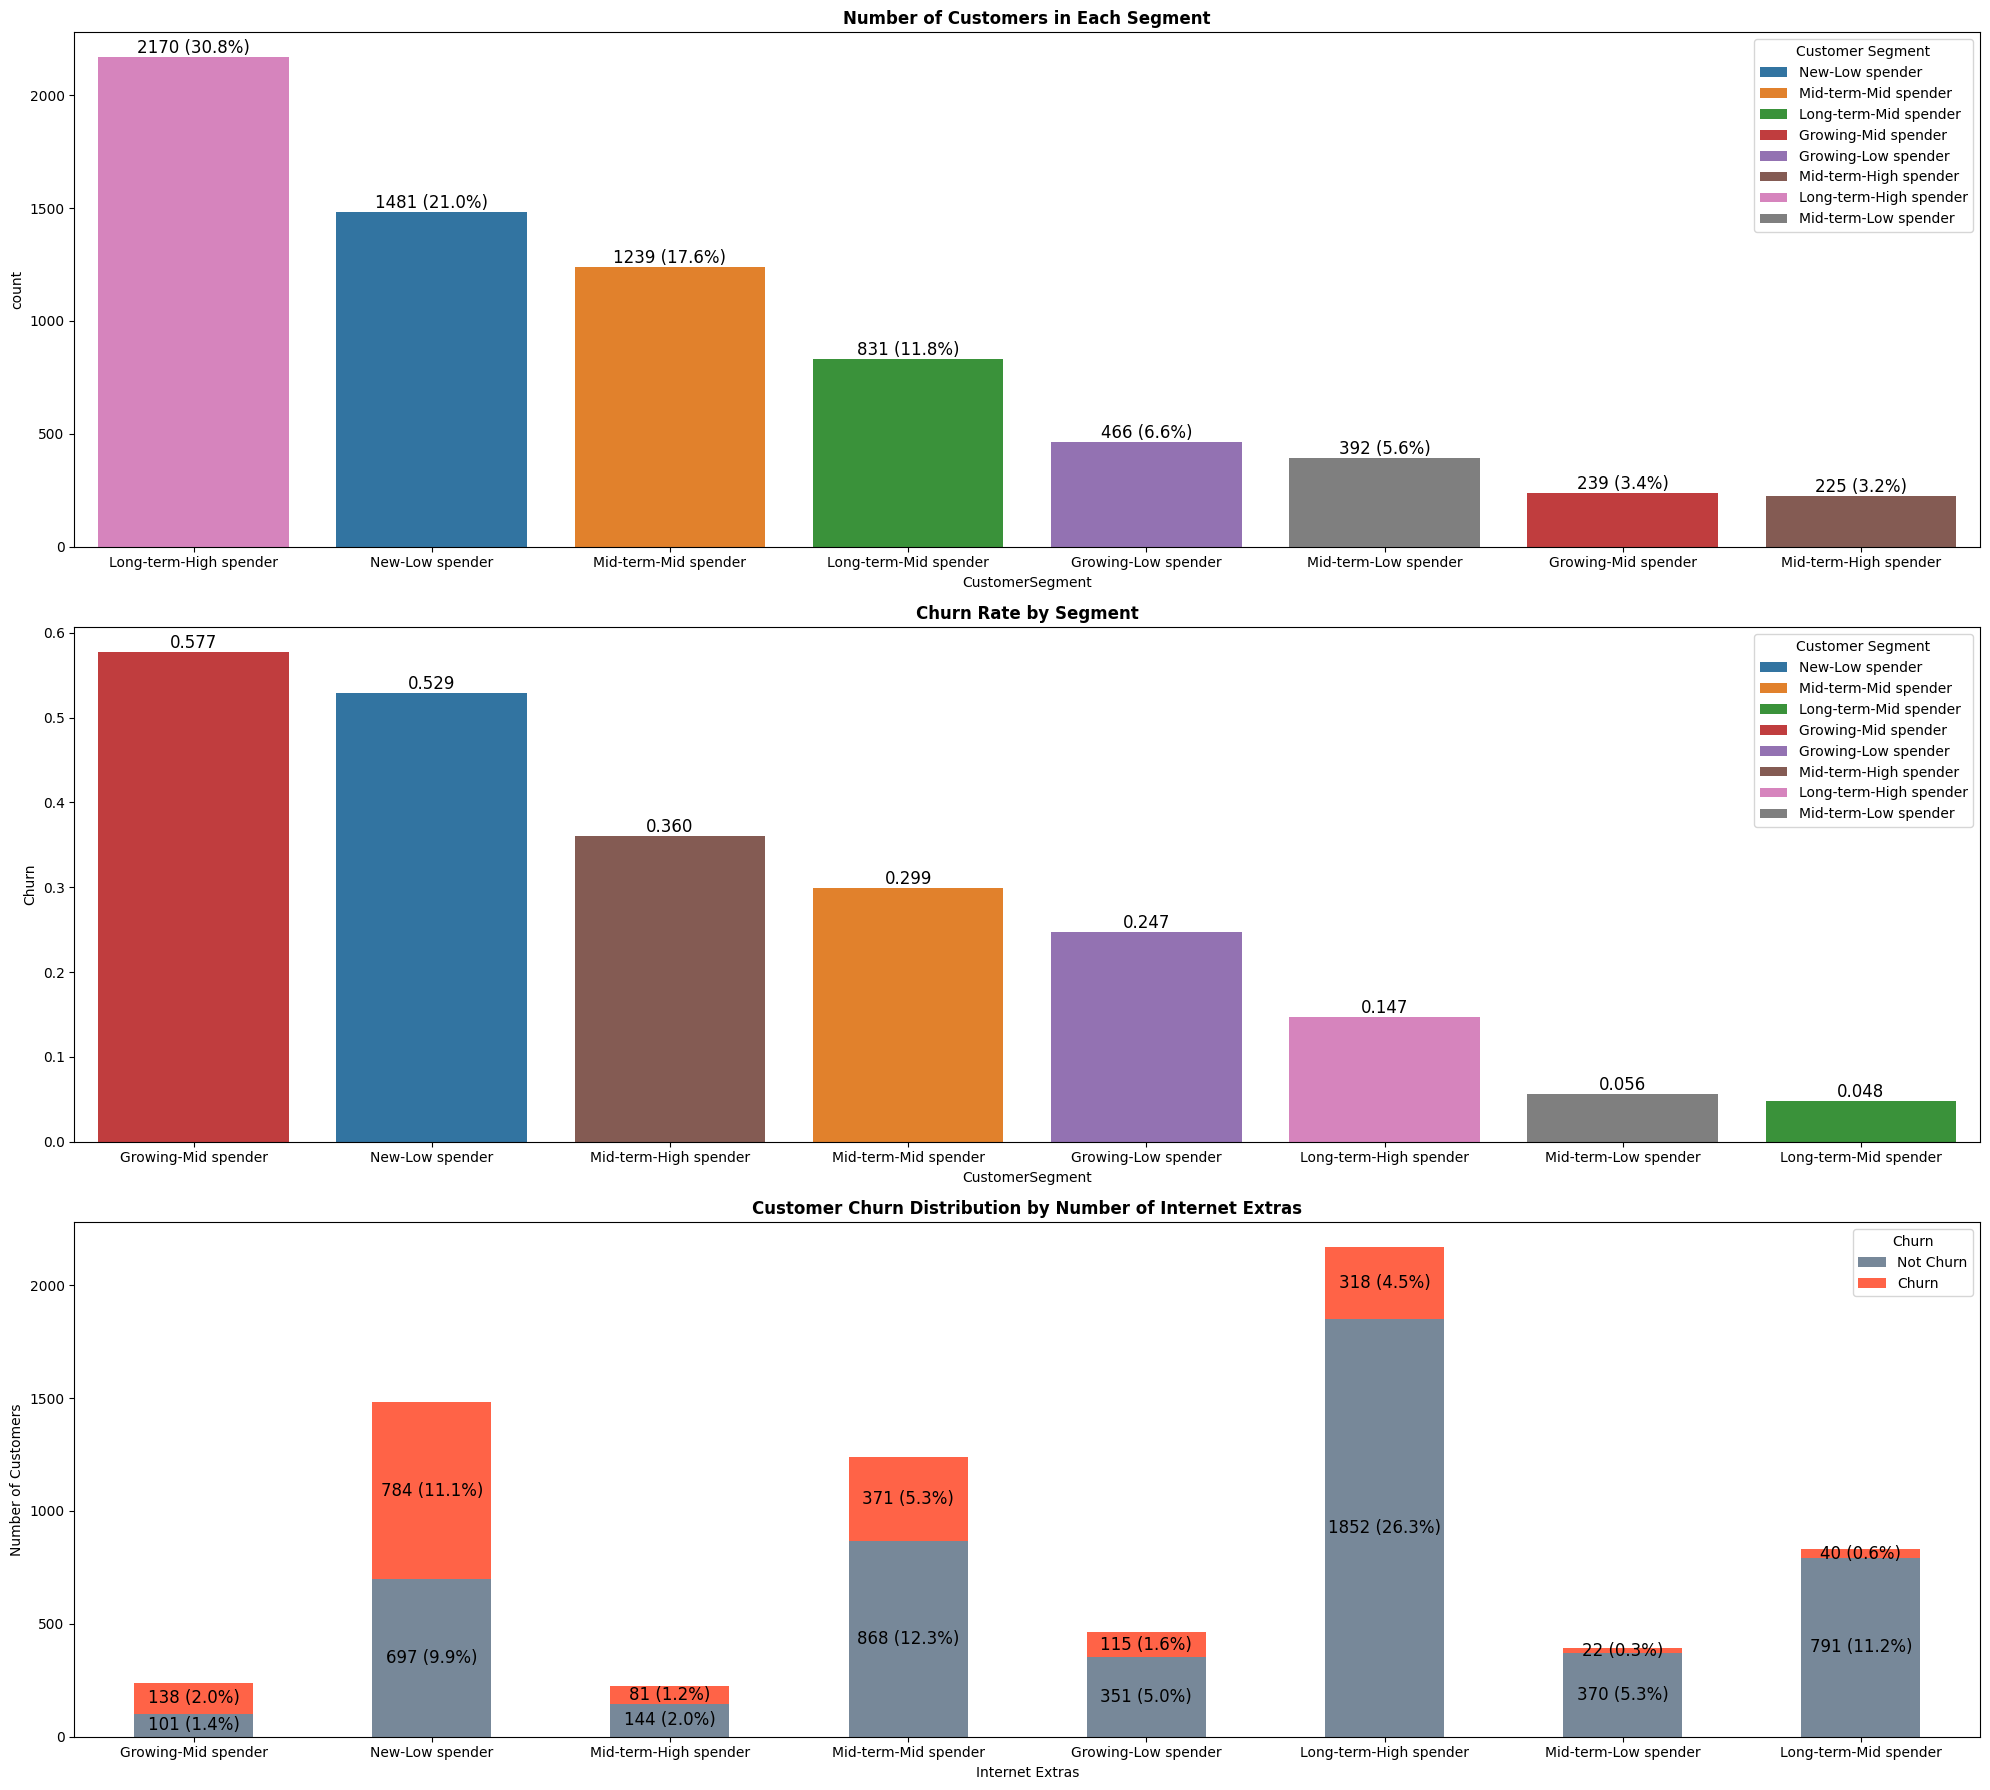

In [983]:
plt.figure(figsize=(20,18))

plt.subplot(3,1,1)
plt.title('Number of Customers in Each Segment', fontweight='bold')
ax1 = sns.countplot(x=df['CustomerSegment'], order=df['CustomerSegment'].value_counts().index, hue=df['CustomerSegment'], legend=True)
for p in ax1.patches:
    if p.get_height() > 1:
        ax1.annotate(f'{p.get_height():.0f} ({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12)
plt.legend(title='Customer Segment')

plt.subplot(3,1,2)
plt.title('Churn Rate by Segment', fontweight='bold')
ax2 = sns.barplot(x=df['CustomerSegment'], y=df['Churn'], errorbar=None, order=df.groupby('CustomerSegment')['Churn'].mean().sort_values(ascending=False).index, hue=df['CustomerSegment'], legend=True)
for p in ax2.containers:
    ax2.bar_label(p, fmt='%.3f', fontsize=12)
plt.legend(title='Customer Segment')

plt.subplot(3,1,3)
ax = ct_sorted.plot(kind='bar', stacked=True, color=['lightslategrey', 'tomato'], ax=plt.gca())
plt.title(f'Customer Churn Distribution by Number of Internet Extras', fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({p.get_height()*100/len(df):.1f}%)', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=12)
plt.xlabel('Internet Extras')
plt.ylabel('Number of Customers')
plt.xticks(rotation=360)
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

plt.tight_layout()
plt.show()

Approximately 31% of customers, 2170 customers in total, belong to the Long-term-High spender segment. This is a positive indicator for the company, as this group is both the most loyal and bring the most revenue. Additionally, their churn rate of 14.7% ranks among the lowest three, making them a relatively stable customer group. On the other hand, the Growing-Mid spender segment has the highest churn rate at 57.7%, despite its smaller size. Several factors may contribute to this:
- These customers have not yet developed strong loyalty to the company. After 6–12 months of experience, if their expectations are not met, they are more likely to leave.
- Many were initially attracted by promotional plans, but once those end, they face higher bills or reduced benefits, prompting them to churn.
- Many of them are in month-to-month contract, making it easier for them to switch providers since they are not tied to long-term commitments.
- The mid spender customers are usually represent a segment that is neither loyal nor tight on budget, they are more likely to explore alternatives and compare prices, increasing their likelihood of churn.

### **Export to CSV**

In [984]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,SegmentTenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetExtras,TotalServices,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SegmentCharges,CustomerSegment,Churn
0,7590-VHVEG,Female,No,Yes,No,1,New,No,No phone service,DSL,No,Yes,No,No,No,No,1,2,Month-to-month,Yes,Electronic check,29.85,29.85,Low spender,New-Low spender,0
1,5575-GNVDE,Male,No,No,No,34,Mid-term,Yes,No,DSL,Yes,No,Yes,No,No,No,2,4,One year,No,Mailed check,56.95,1889.50,Mid spender,Mid-term-Mid spender,0
2,3668-QPYBK,Male,No,No,No,2,New,Yes,No,DSL,Yes,Yes,No,No,No,No,2,4,Month-to-month,Yes,Mailed check,53.85,108.15,Low spender,New-Low spender,1
3,7795-CFOCW,Male,No,No,No,45,Long-term,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,3,4,One year,No,Bank transfer (automatic),42.30,1840.75,Mid spender,Long-term-Mid spender,0
4,9237-HQITU,Female,No,No,No,2,New,Yes,No,Fiber optic,No,No,No,No,No,No,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Low spender,New-Low spender,1


In [985]:
df.to_csv('Telco Customer Churn.csv', index=False)

## **Conlusion**

There are 1869 churned customers, making up 26.5% of the total customer base.

**Tenure and Contract:**
Customers with longer tenure periods and long-term contracts are less likely to churn, while new customers and those with monthly contracts are more prone to churn. Since they have no long-term commitment, building trust and good relationship is one key to prevent them to churn.

**Service and Pricing:**
Services that offer more features and additional benefits generally come at a higher price. However, customers have the opportunity to secure a lower price by choosing a contract package with a duration of one to two years, which provides cost savings in exchange for a longer commitment.

**Internet Service:**
Most customers who use internet service prefer fiber optic, but fiber optic users tend to have a higher churn rate, likely due to its higher costs compared to other alternatives.

**Demographics:**
Customers without a spouse or dependents tend to be more flexible in switching providers and are more price-sensitive.

**Billing:**
Customers with digital (paperless) billing tend to have a higher churn rate because there is no direct engagement like physical bills. Without a tangible visual reminder, the urgency to pay is reduced, making them more likely to forget and eventually face service disruptions.

**Payment Method:**
Manual payments are prone to technical errors, such as failed transactions or delayed processing, which can lead to service disconnection.

**Additional Services:**
Customers who use additional internet services have a lower churn rate, indicating that these services enhance customer satisfaction.  

**Customer Segmentation:**
To make effective retention strategies, we divided customers into eight segments, there are Long-term-High Spender, Long-term-Mid Spender, Mid-term-High Spender, Mid-term-Mid Spender, Growing-Mid Spender, Mid-term-Low Spender, Growing-Low Spender, and New-Low Spender.

## **Recommendation**

**For Business**

-Encouraging customers to switch to long-term contracts will benefit the company by **increasing customer retention** and **maximizing total revenue**. Additionally, since customers with **more services** generate **significantly higher revenue**, offering a **bundled service discount** or a **discount for switching to long-term contracts** can further **increase revenue** while keeping customers engaged for a longer period. The actions taken will be tailored to each segment level accordingly.

`Bundling Package` → These bundling packages combine internet add-on services with both high and low churn rates

  **a. Premium Entertainment:**
  - StreamingMovies + StreamingTV + TechSupport
  - StreamingMovies + StreamingTV + OnlineSecurity

  **b. Protection & Backup:**
  - DeviceProtection + OnlineBackup + TechSupport

  **c. All-in-One:**
  - StreamingMovies + StreamingTV + DeviceProtection + TechSupport

If each service has an average price of $20, then:
  - 3 services = $60 → 10% discount → Final price $54
  - 4 services = $80 → 15% discount → Final price $68

-Price fiber optic → Conduct a **review of the pricing policy** to ensure competitiveness with other providers, then implement a **re-pricing strategy** to improve customer retention.

-Paperless billing → Send **automated reminder** notifications via SMS, email, or app three days **before the due date** to ensure timely payments and reduce the risk of service disruptions.

-Payment method → **Improve the service quality** of **electronic check payments** by addressing issues such as **failed transactions** or **processing delays**, and ensure **proactive customer care** to handle **customer complaints** efficiently.

-Customer Satisfaction Survey → Conduct **regular customer satisfaction surveys** to gather feedback on **service quality, billing, and overall experience**.

**For Each Segmentation**

To design an effective loyalty program, we categorized the eight customer segments into three tiers based on their spending behavior and retention potential. These tiers will help tailor rewards and incentives to maximize customer satisfaction and reduce churn.

- **Gold**: Long-term-High spender, Long-term-Mid spender, Mid-term-High spender
  - **Loyalty Programs**: point rewards. *5%* of MonthlyCharges converted into points per month. MonthlyCharges = $83 → 4 points/month.  
    - 1 point = $1 discount for add-ons (e.g., Streaming TV).  
    - 50 points = 1 month of free **add-on services**.
  - **Upselling**:  Provide a 5%-10% **discount** on **add-on service or bundling**, depending on each **service margin**.

- **Silver**: Mid-term-Mid spender, Growing-Mid spender
  - **Loyalty Programs**:   point rewards. *3%* of MonthlyCharges converted into points per month. MonthlyCharges = $76 → 2 points/month.  
    - 1 point = $0.5 discount for add-ons (e.g., Streaming Movies).  
    - 30 points = 1 month of free **basic services**.  
  - **Discount**: Provide a 5%-10% **discount** for **package upgrades** (e.g., dari 50Mbps to 100Mbps), depending on each **service margin**.

- **Bronze**: Mid-term-Low spender, Growing-Low spender, New-term-Low spender
  - **Loyalty Programs**:  point rewards. *2%* of MonthlyCharges converted into points per month. MonthlyCharges = $45 → 1 poin/bulan.  
    - 1 point = $0.25 discoun for add-ons.    
  - **Promo Trial**: Provide access to all services that have not yet been tried, allowing new customers to experience the full benefits of the provider's services.
  - **Enhance Onboarding & Proactive Support**:
    - Improve the onboarding process with clear guidance and a seamless initial experience.
    - Offer proactive support with quick responses to customer complaints, such as service or billing issues.